In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hirise-v1/rdr_nomap_browse/vetting_labels.csv
/kaggle/input/hirise-v1/rdr_nomap_browse/manifest.csv
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/003324_ESP_022913_0930_r897_c1229.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/007118_PSP_005074_1270_r4140_c1536.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/008192_ESP_023419_1520_r4335_c1946.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/007383_PSP_010451_2090_r975_c102.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/002926_ESP_023359_1710_r416_c1229.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/004967_PSP_005130_1795_r1052_c1229.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/001914_ESP_023098_1510_r1400_c1126.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/005665_PSP_010317_1230_r376_c307.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/005183_ESP_012486_1220_r2247_c512.png
/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty/001858_ESP_022908_1855_r4496_c18

In [3]:
import numpy as np
import random
import cv2

In [4]:
%pwd

'/kaggle/working'

In [5]:
# %mkdir dataset
# !cp 'kaggle/input/hirise-v1/rdr_nomap_browse' dataset/
# %cd dataset

In [6]:
# !unzip -q rdr_nomap_browse.zip 
# %cd rdr_nomap_browse

In [7]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

#/kaggle/input/hirise-v1/rdr_nomap_browse/

path = '/kaggle/input/hirise-v1/rdr_nomap_browse'
data = '/kaggle/input/hirise-v1/rdr_nomap_browse/manifest.csv'
path_dusty = '/kaggle/input/hirise-v1/rdr_nomap_browse/dusty'
path_not_dusty = '/kaggle/input/hirise-v1/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/kaggle/input/hirise-v1/rdr_nomap_browse'

In [8]:
df.sample(10)

,#dataset,id,label
8240,train,000616_ESP_019454_2610_r2693_c1946,not_dusty
10742,validation,003941_ESP_023094_2110_r576_c205,dusty
4379,train,004243_PSP_004326_1525_r4073_c819,dusty
7300,train,004264_PSP_004924_1650_r6925_c819,not_dusty
15071,test,009899_PSP_004457_2130_r24383_c307,dusty
6691,train,002952_PSP_003676_2180_r1576_c717,not_dusty
9764,train,000385_ESP_012310_1715_r4197_c1331,not_dusty
5275,train,003777_ESP_019459_2185_r573_c1638,not_dusty
11773,validation,008067_PSP_004496_2160_r17664_c205,dusty
13939,validation,004751_ESP_014114_0935_r1449_c1434,not_dusty


In [9]:
Xtrain_list = []
Ytrain_list = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'not_dusty':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})

In [10]:
from skimage import io

# p = '/content/dataset/rdr_nomap_browse/not_dusty/'

Xtrain = []

curr_dir = '/kaggle/input/hirise-v1/rdr_nomap_browse'

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + 'not_dusty' + '/' + x['id'] + '.png'))

In [11]:
from collections import Counter
print(len(Xtrain))

4961


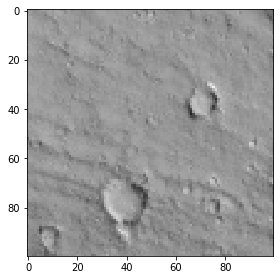

In [12]:
io.imshow(Xtrain[4000])

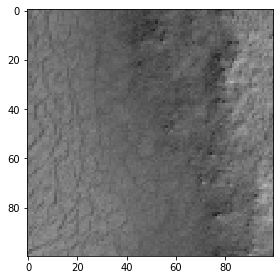

In [13]:
io.imshow(Xtrain[1102])

In [14]:
norm = np.max(Xtrain)-np.min(Xtrain)
for i in range(len(Xtrain)):
  Xtrain[i] = Xtrain[i]/norm

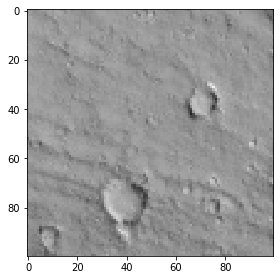

In [15]:
io.imshow(Xtrain[4000])

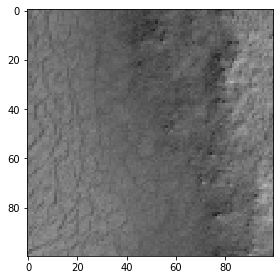

In [16]:
io.imshow(Xtrain[1102])

In [17]:
import random
import cv2

def add_noise_prm(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 205-255
		img[y_coord][x_coord] = np.random.randint(175,255)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 0-50
		img[y_coord][x_coord] = np.random.randint(125,205)
		
	return img

In [18]:
from skimage import img_as_ubyte

NoisyX= []

for x in Xtrain:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyX.append(img)

In [19]:
NoisyX[0].shape

(100, 100)

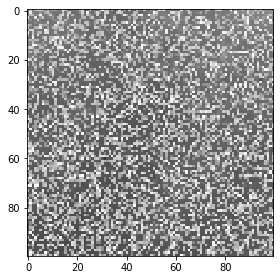

In [21]:
io.imshow(NoisyX[3])

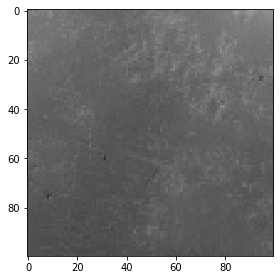

In [22]:
io.imshow(Xtrain[3])

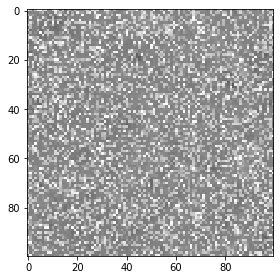

In [85]:
io.imshow(NoisyX[5])

In [24]:
X_train = np.array(Xtrain)
NoisyX = np.array(NoisyX)

In [25]:
# X_train = X_train.reshape(len(X_train),256,256,1)
# NoisyX = NoisyX.reshape(len(NoisyX),256,256,1)
# X_train.shape

In [26]:
NoisyX.shape

(4961, 100, 100)

In [34]:
X_train.shape

(4961, 100, 100)

In [28]:
import cv2
from skimage import img_as_ubyte

XtrainRs = []

for i in range(len(Xtrain)):
  res = cv2.resize(Xtrain[i], dsize=(256, 256), interpolation=cv2.INTER_LINEAR)
  XtrainRs.append(res)

NoisyXrs= []

for x in XtrainRs:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyXrs.append(img)

X_trainRs = np.array(XtrainRs)
NoisyXrs = np.array(NoisyXrs)
X_trainRs = X_trainRs.reshape(len(X_trainRs),256,256,1)
NoisyXrs = NoisyXrs.reshape(len(NoisyXrs),256,256,1)
X_trainRs.shape

(4961, 256, 256, 1)

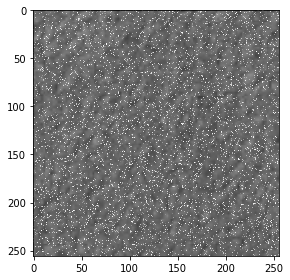

In [88]:
io.imshow(NoisyXrs[2])

In [35]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt

# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.initializers import RandomNormal
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, Activation
# from tensorflow.keras.layers import BatchNormalization, Concatenate, Dropout
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.models import load_model
# from os import listdir
# from numpy import asarray, load
# from numpy import vstack
# from numpy import savez_compressed
# from matplotlib import pyplot
# import numpy as np
# from matplotlib import pyplot as plt
# from numpy.random import randint
# from numpy import zeros
# from numpy import ones

# train_dataset = tf.data.Dataset.from_tensor_slices((X_trainRs, NoisyXrs))

# BATCH_SIZE = 4
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
     

In [36]:
# Encoder Block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    init = RandomNormal(stddev=0.02)
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    g = LeakyReLU(alpha=0.2)(g)
    return g

# Decoder Block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    init = RandomNormal(stddev=0.02)
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    g = BatchNormalization()(g, training=True)
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    g = Activation('relu')(g)
    return g

# Define the overall generator architecture
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # image input
    in_image = Input(shape=image_shape)
    
    # encoder model: C64-C128-C256-C512-C512-C512-C512-C512
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)
    
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    
    # decoder model: CD512-CD512-CD512-C512-C256-C128-C64
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    
    # output
    g = Conv2DTranspose(image_shape[2], (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7) #Modified 
    out_image = Activation('tanh')(g)  #Generates images in the range -1 to 1. So change inputs also to -1 to 1
    
    # define model
    model = Model(in_image, out_image)
    return model


def define_discriminator(image_shape):
    
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # source image input
    in_src_image = Input(shape=image_shape)  
    
    # target image input
    in_target_image = Input(shape=image_shape)  
    
    # concatenate images, channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    
    # C64: 4x4 kernel Stride 2x2
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    
    # C128: 4x4 kernel Stride 2x2
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    # C256: 4x4 kernel Stride 2x2
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    # C512: 4x4 kernel Stride 2x2 
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    # second last output layer : 4x4 kernel but Stride 1x1 (Optional)
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    opt = Adam(lr=0.0002, beta_1=0.5)
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

In [37]:
# define the combined GAN architecture
def define_gan(g_model, d_model, image_shape):
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
            
    in_src = Input(shape=image_shape)
    gen_out = g_model(in_src)
    dis_out = d_model([in_src, gen_out])
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    
    model.compile(loss=['binary_crossentropy', 'mae'], 
               optimizer=opt, loss_weights=[1,100])
    
    return model

def generate_real_samples(dataset, n_samples, patch_shape):
    trainA, trainB = dataset
    ix = randint(0, trainA.shape[0], n_samples)
    X1, X2 = trainA[ix], trainB[ix]
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y

def generate_fake_samples(g_model, samples, patch_shape):
    X = g_model.predict(samples)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [43]:
#save the generator model and check how good the generated image looks. 
def summarize_performance(step, g_model, dataset, n_samples=3):
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    
    # scale all pixels from [-1,1] to [0,1]
#     X_realA = (X_realA + 1) / 2.0
#     X_realB = (X_realB + 1) / 2.0
#     X_fakeB = (X_fakeB + 1) / 2.0
    
    # plot real source images
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_realA[i])
        
    # plot generated target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(X_fakeB[i])
        
    # plot real target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples*2 + i)
        plt.axis('off')
        plt.imshow(X_realB[i])
        
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(filename1)
    plt.close()
    
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))


# train function for the pix2pix model
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
    n_patch = d_model.output_shape[1]
    trainA, trainB = dataset
    bat_per_epo = int(len(trainA) / n_batch)
    n_steps = bat_per_epo * n_epochs
    
    for i in range(n_steps):
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        
        # summarize model performance
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        if (i+1) % (bat_per_epo * 10) == 0:
            summarize_performance(i, g_model, dataset)

In [39]:
dataset = [NoisyXrs, X_trainRs]

image_shape = dataset[0].shape[1:]
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

from datetime import datetime 
start1 = datetime.now() 

train(d_model, g_model, gan_model, dataset, n_epochs=2, n_batch=1) 

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

>1, d1[0.615] d2[0.645] g[53.680]
>2, d1[0.443] d2[0.730] g[38.431]
>3, d1[0.393] d2[0.721] g[10.225]
>4, d1[0.545] d2[0.398] g[57.895]
>5, d1[0.535] d2[0.446] g[39.610]
>6, d1[0.515] d2[0.433] g[44.890]
>7, d1[0.491] d2[0.541] g[20.407]
>8, d1[0.524] d2[0.408] g[52.537]
>9, d1[0.521] d2[0.447] g[41.320]
>10, d1[0.510] d2[0.424] g[37.731]
>11, d1[0.494] d2[0.457] g[26.677]
>12, d1[0.494] d2[0.468] g[31.784]
>13, d1[0.511] d2[0.423] g[46.980]
>14, d1[0.500] d2[0.491] g[33.343]
>15, d1[0.497] d2[0.438] g[37.256]
>16, d1[0.484] d2[0.443] g[30.995]
>17, d1[0.488] d2[0.438] g[36.982]
>18, d1[0.492] d2[0.429] g[37.248]
>19, d1[0.483] d2[0.519] g[17.155]
>20, d1[0.499] d2[0.444] g[35.771]
>21, d1[0.484] d2[0.430] g[33.466]
>22, d1[0.488] d2[0.432] g[38.620]
>23, d1[0.480] d2[0.461] g[22.649]
>24, d1[0.469] d2[0.468] g[25.202]
>25, d1[0.476] d2[0.437] g[36.309]
>26, d1[0.471] d2[0.489] g[14.225]
>27, d1[0.488] d2[0.420] g[35.902]
>28, d1[0.501] d2[0.418] g[44.416]
>29, d1[0.488] d2[0.434] g[38

2022-12-04 04:46:50.045805: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>657, d1[0.358] d2[0.363] g[9.435]
>658, d1[0.354] d2[0.364] g[8.276]
>659, d1[0.353] d2[0.365] g[10.936]
>660, d1[0.360] d2[0.363] g[10.756]
>661, d1[0.355] d2[0.364] g[9.258]
>662, d1[0.352] d2[0.366] g[12.501]
>663, d1[0.356] d2[0.364] g[10.755]
>664, d1[0.355] d2[0.364] g[8.730]
>665, d1[0.356] d2[0.363] g[16.111]
>666, d1[0.354] d2[0.364] g[5.178]
>667, d1[0.357] d2[0.363] g[9.472]
>668, d1[0.353] d2[0.365] g[3.727]
>669, d1[0.357] d2[0.362] g[9.386]
>670, d1[0.356] d2[0.364] g[7.730]
>671, d1[0.359] d2[0.363] g[9.692]
>672, d1[0.356] d2[0.367] g[10.174]
>673, d1[0.356] d2[0.363] g[9.391]
>674, d1[0.360] d2[0.365] g[15.004]
>675, d1[0.353] d2[0.365] g[9.872]
>676, d1[0.354] d2[0.364] g[10.921]
>677, d1[0.356] d2[0.363] g[7.033]
>678, d1[0.356] d2[0.363] g[6.704]
>679, d1[0.353] d2[0.365] g[10.709]
>680, d1[0.355] d2[0.363] g[8.587]
>681, d1[0.354] d2[0.364] g[10.590]
>682, d1[0.355] d2[0.363] g[10.798]
>683, d1[0.357] d2[0.363] g[8.917]
>684, d1[0.354] d2[0.364] g[7.660]
>685, d1[

2022-12-04 04:47:59.374212: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>1198, d1[0.349] d2[0.362] g[6.618]
>1199, d1[0.348] d2[0.362] g[7.413]
>1200, d1[0.349] d2[0.362] g[7.819]
>1201, d1[0.350] d2[0.362] g[5.973]
>1202, d1[0.349] d2[0.362] g[7.456]
>1203, d1[0.348] d2[0.363] g[7.542]
>1204, d1[0.348] d2[0.363] g[6.143]
>1205, d1[0.347] d2[0.363] g[6.727]
>1206, d1[0.348] d2[0.363] g[9.626]
>1207, d1[0.348] d2[0.362] g[6.796]
>1208, d1[0.349] d2[0.362] g[10.424]
>1209, d1[0.352] d2[0.362] g[8.391]
>1210, d1[0.349] d2[0.363] g[6.238]
>1211, d1[0.347] d2[0.364] g[4.171]
>1212, d1[0.348] d2[0.363] g[7.891]
>1213, d1[0.354] d2[0.365] g[10.678]
>1214, d1[0.348] d2[0.364] g[6.885]
>1215, d1[0.349] d2[0.363] g[8.051]
>1216, d1[0.349] d2[0.363] g[5.760]
>1217, d1[0.347] d2[0.364] g[7.350]
>1218, d1[0.348] d2[0.363] g[6.253]
>1219, d1[0.348] d2[0.363] g[5.237]
>1220, d1[0.347] d2[0.364] g[11.591]
>1221, d1[0.349] d2[0.362] g[6.191]
>1222, d1[0.348] d2[0.363] g[8.072]
>1223, d1[0.349] d2[0.362] g[8.219]
>1224, d1[0.348] d2[0.362] g[5.325]
>1225, d1[0.348] d2[0.363

2022-12-04 04:48:53.379382: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>1626, d1[0.347] d2[0.363] g[6.331]
>1627, d1[0.345] d2[0.364] g[3.927]
>1628, d1[0.345] d2[0.364] g[10.489]
>1629, d1[0.346] d2[0.363] g[8.961]
>1630, d1[0.346] d2[0.363] g[5.085]
>1631, d1[0.345] d2[0.364] g[4.986]
>1632, d1[0.346] d2[0.363] g[7.809]
>1633, d1[0.346] d2[0.365] g[6.201]
>1634, d1[0.346] d2[0.363] g[7.439]
>1635, d1[0.345] d2[0.364] g[6.043]
>1636, d1[0.345] d2[0.364] g[3.934]
>1637, d1[0.345] d2[0.364] g[2.736]
>1638, d1[0.346] d2[0.363] g[12.905]
>1639, d1[0.346] d2[0.363] g[6.345]
>1640, d1[0.346] d2[0.363] g[10.433]
>1641, d1[0.346] d2[0.363] g[5.591]
>1642, d1[0.351] d2[0.361] g[15.226]
>1643, d1[0.345] d2[0.364] g[7.239]
>1644, d1[0.345] d2[0.364] g[7.502]
>1645, d1[0.344] d2[0.364] g[7.406]
>1646, d1[0.345] d2[0.364] g[6.184]
>1647, d1[0.345] d2[0.364] g[3.401]
>1648, d1[0.345] d2[0.364] g[7.053]
>1649, d1[0.345] d2[0.364] g[7.975]
>1650, d1[0.346] d2[0.363] g[6.688]
>1651, d1[0.345] d2[0.364] g[5.481]
>1652, d1[0.345] d2[0.363] g[4.266]
>1653, d1[0.345] d2[0.36

2022-12-04 04:51:27.472461: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>2840, d1[0.347] d2[0.358] g[3.557]
>2841, d1[0.347] d2[0.358] g[6.319]
>2842, d1[0.347] d2[0.358] g[8.425]
>2843, d1[0.347] d2[0.358] g[8.914]
>2844, d1[0.347] d2[0.358] g[6.105]
>2845, d1[0.347] d2[0.358] g[4.499]
>2846, d1[0.347] d2[0.358] g[6.365]
>2847, d1[0.347] d2[0.358] g[4.495]
>2848, d1[0.347] d2[0.358] g[4.995]
>2849, d1[0.347] d2[0.358] g[7.265]
>2850, d1[0.347] d2[0.358] g[7.153]
>2851, d1[0.347] d2[0.358] g[3.024]
>2852, d1[0.347] d2[0.358] g[3.639]
>2853, d1[0.347] d2[0.357] g[5.308]
>2854, d1[0.347] d2[0.358] g[5.385]
>2855, d1[0.347] d2[0.357] g[3.545]
>2856, d1[0.347] d2[0.357] g[5.884]
>2857, d1[0.347] d2[0.357] g[5.102]
>2858, d1[0.347] d2[0.358] g[5.594]
>2859, d1[0.347] d2[0.358] g[5.231]
>2860, d1[0.347] d2[0.358] g[4.213]
>2861, d1[0.347] d2[0.357] g[4.932]
>2862, d1[0.347] d2[0.357] g[5.705]
>2863, d1[0.347] d2[0.357] g[4.563]
>2864, d1[0.347] d2[0.357] g[4.816]
>2865, d1[0.347] d2[0.357] g[4.827]
>2866, d1[0.347] d2[0.357] g[3.616]
>2867, d1[0.347] d2[0.357] g

2022-12-04 04:52:11.116811: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>3187, d1[0.348] d2[0.356] g[4.489]
>3188, d1[0.348] d2[0.356] g[5.577]
>3189, d1[0.348] d2[0.356] g[4.914]
>3190, d1[0.348] d2[0.356] g[5.917]
>3191, d1[0.348] d2[0.356] g[3.971]
>3192, d1[0.348] d2[0.356] g[4.609]
>3193, d1[0.348] d2[0.356] g[3.295]
>3194, d1[0.348] d2[0.356] g[6.106]
>3195, d1[0.348] d2[0.356] g[4.958]
>3196, d1[0.348] d2[0.356] g[3.728]
>3197, d1[0.348] d2[0.356] g[4.206]
>3198, d1[0.348] d2[0.356] g[2.840]
>3199, d1[0.348] d2[0.356] g[4.327]
>3200, d1[0.348] d2[0.356] g[4.621]
>3201, d1[0.348] d2[0.356] g[5.070]
>3202, d1[0.348] d2[0.356] g[3.925]
>3203, d1[0.348] d2[0.356] g[4.867]
>3204, d1[0.348] d2[0.356] g[3.347]
>3205, d1[0.348] d2[0.356] g[4.087]
>3206, d1[0.348] d2[0.356] g[4.687]
>3207, d1[0.348] d2[0.356] g[3.092]
>3208, d1[0.348] d2[0.356] g[5.674]
>3209, d1[0.348] d2[0.356] g[3.138]
>3210, d1[0.348] d2[0.356] g[4.853]
>3211, d1[0.348] d2[0.356] g[3.547]
>3212, d1[0.348] d2[0.356] g[3.384]
>3213, d1[0.348] d2[0.356] g[4.879]
>3214, d1[0.348] d2[0.356] g

2022-12-04 04:54:45.999721: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>4407, d1[0.348] d2[0.354] g[4.878]
>4408, d1[0.348] d2[0.354] g[3.510]
>4409, d1[0.348] d2[0.354] g[3.911]
>4410, d1[0.348] d2[0.354] g[4.121]
>4411, d1[0.349] d2[0.354] g[2.625]
>4412, d1[0.348] d2[0.354] g[4.674]
>4413, d1[0.348] d2[0.354] g[2.007]
>4414, d1[0.349] d2[0.354] g[5.674]
>4415, d1[0.348] d2[0.354] g[2.838]
>4416, d1[0.348] d2[0.354] g[5.112]
>4417, d1[0.348] d2[0.354] g[5.982]
>4418, d1[0.348] d2[0.354] g[4.761]
>4419, d1[0.348] d2[0.354] g[3.010]
>4420, d1[0.348] d2[0.354] g[3.635]
>4421, d1[0.348] d2[0.354] g[2.550]
>4422, d1[0.348] d2[0.354] g[2.705]
>4423, d1[0.348] d2[0.354] g[3.599]
>4424, d1[0.348] d2[0.354] g[3.799]
>4425, d1[0.348] d2[0.354] g[3.046]
>4426, d1[0.348] d2[0.354] g[3.157]
>4427, d1[0.348] d2[0.354] g[2.491]
>4428, d1[0.348] d2[0.354] g[5.128]
>4429, d1[0.348] d2[0.354] g[2.596]
>4430, d1[0.348] d2[0.354] g[5.342]
>4431, d1[0.348] d2[0.354] g[4.755]
>4432, d1[0.348] d2[0.354] g[4.471]
>4433, d1[0.348] d2[0.354] g[2.886]
>4434, d1[0.347] d2[0.354] g

2022-12-04 04:59:27.045036: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>6633, d1[0.347] d2[0.352] g[2.306]
>6634, d1[0.347] d2[0.352] g[2.929]
>6635, d1[0.347] d2[0.352] g[2.031]
>6636, d1[0.347] d2[0.352] g[2.739]
>6637, d1[0.347] d2[0.352] g[2.498]
>6638, d1[0.347] d2[0.352] g[5.275]
>6639, d1[0.347] d2[0.352] g[2.577]
>6640, d1[0.347] d2[0.352] g[4.533]
>6641, d1[0.347] d2[0.352] g[3.061]
>6642, d1[0.347] d2[0.352] g[3.921]
>6643, d1[0.347] d2[0.352] g[2.771]
>6644, d1[0.347] d2[0.352] g[3.439]
>6645, d1[0.347] d2[0.352] g[2.187]
>6646, d1[0.347] d2[0.352] g[3.793]
>6647, d1[0.347] d2[0.352] g[2.842]
>6648, d1[0.347] d2[0.352] g[2.278]
>6649, d1[0.347] d2[0.352] g[2.376]
>6650, d1[0.347] d2[0.352] g[2.456]
>6651, d1[0.347] d2[0.352] g[2.613]
>6652, d1[0.347] d2[0.352] g[1.886]
>6653, d1[0.347] d2[0.352] g[3.479]
>6654, d1[0.347] d2[0.352] g[2.612]
>6655, d1[0.347] d2[0.352] g[2.834]
>6656, d1[0.347] d2[0.352] g[3.483]
>6657, d1[0.347] d2[0.352] g[1.917]
>6658, d1[0.347] d2[0.352] g[1.974]
>6659, d1[0.347] d2[0.352] g[1.733]
>6660, d1[0.347] d2[0.352] g

2022-12-04 05:00:15.060849: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>7016, d1[0.347] d2[0.352] g[2.931]
>7017, d1[0.347] d2[0.352] g[6.590]
>7018, d1[0.347] d2[0.352] g[4.067]
>7019, d1[0.347] d2[0.352] g[2.554]
>7020, d1[0.347] d2[0.352] g[3.229]
>7021, d1[0.347] d2[0.352] g[1.839]
>7022, d1[0.347] d2[0.352] g[2.632]
>7023, d1[0.347] d2[0.352] g[2.268]
>7024, d1[0.347] d2[0.352] g[3.101]
>7025, d1[0.347] d2[0.352] g[2.392]
>7026, d1[0.347] d2[0.352] g[3.558]
>7027, d1[0.347] d2[0.352] g[1.789]
>7028, d1[0.347] d2[0.352] g[2.123]
>7029, d1[0.347] d2[0.352] g[2.355]
>7030, d1[0.347] d2[0.352] g[2.301]
>7031, d1[0.347] d2[0.352] g[1.507]
>7032, d1[0.347] d2[0.352] g[2.220]
>7033, d1[0.347] d2[0.352] g[2.795]
>7034, d1[0.347] d2[0.352] g[2.137]
>7035, d1[0.347] d2[0.352] g[2.159]
>7036, d1[0.347] d2[0.352] g[1.811]
>7037, d1[0.347] d2[0.352] g[1.756]
>7038, d1[0.347] d2[0.352] g[3.246]
>7039, d1[0.347] d2[0.352] g[2.086]
>7040, d1[0.347] d2[0.352] g[2.484]
>7041, d1[0.347] d2[0.352] g[3.015]
>7042, d1[0.347] d2[0.352] g[2.313]
>7043, d1[0.347] d2[0.352] g

2022-12-04 05:00:52.050380: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>7309, d1[0.346] d2[0.352] g[3.528]
>7310, d1[0.346] d2[0.352] g[3.455]
>7311, d1[0.346] d2[0.352] g[3.518]
>7312, d1[0.346] d2[0.352] g[2.970]
>7313, d1[0.346] d2[0.352] g[4.429]
>7314, d1[0.346] d2[0.352] g[2.892]
>7315, d1[0.346] d2[0.352] g[6.216]
>7316, d1[0.346] d2[0.352] g[4.076]
>7317, d1[0.346] d2[0.352] g[7.193]
>7318, d1[0.346] d2[0.352] g[7.233]
>7319, d1[0.346] d2[0.352] g[3.041]
>7320, d1[0.346] d2[0.352] g[4.209]
>7321, d1[0.346] d2[0.352] g[2.531]
>7322, d1[0.346] d2[0.352] g[5.653]
>7323, d1[0.346] d2[0.352] g[3.506]
>7324, d1[0.346] d2[0.352] g[2.357]
>7325, d1[0.346] d2[0.352] g[5.056]
>7326, d1[0.346] d2[0.352] g[3.054]
>7327, d1[0.346] d2[0.352] g[2.228]
>7328, d1[0.346] d2[0.352] g[2.111]
>7329, d1[0.346] d2[0.352] g[2.516]
>7330, d1[0.346] d2[0.352] g[1.751]
>7331, d1[0.346] d2[0.352] g[2.475]
>7332, d1[0.346] d2[0.352] g[2.510]
>7333, d1[0.346] d2[0.352] g[1.800]
>7334, d1[0.346] d2[0.352] g[2.107]
>7335, d1[0.346] d2[0.352] g[2.619]
>7336, d1[0.346] d2[0.352] g

2022-12-04 05:00:59.546391: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>7369, d1[0.347] d2[0.352] g[2.458]
>7370, d1[0.347] d2[0.352] g[2.071]
>7371, d1[0.347] d2[0.352] g[2.109]
>7372, d1[0.347] d2[0.352] g[2.378]
>7373, d1[0.347] d2[0.352] g[2.524]
>7374, d1[0.347] d2[0.352] g[4.512]
>7375, d1[0.347] d2[0.352] g[3.153]
>7376, d1[0.347] d2[0.352] g[3.225]
>7377, d1[0.347] d2[0.352] g[1.798]
>7378, d1[0.347] d2[0.352] g[3.854]
>7379, d1[0.347] d2[0.352] g[3.512]
>7380, d1[0.347] d2[0.352] g[2.862]
>7381, d1[0.347] d2[0.352] g[3.060]
>7382, d1[0.347] d2[0.352] g[2.105]
>7383, d1[0.347] d2[0.352] g[2.107]
>7384, d1[0.347] d2[0.352] g[2.528]
>7385, d1[0.347] d2[0.352] g[3.250]
>7386, d1[0.347] d2[0.352] g[4.558]
>7387, d1[0.347] d2[0.352] g[2.416]
>7388, d1[0.347] d2[0.352] g[2.371]
>7389, d1[0.347] d2[0.352] g[3.164]
>7390, d1[0.347] d2[0.352] g[2.680]
>7391, d1[0.347] d2[0.352] g[3.283]
>7392, d1[0.347] d2[0.352] g[4.781]
>7393, d1[0.347] d2[0.352] g[2.307]
>7394, d1[0.347] d2[0.352] g[6.287]
>7395, d1[0.347] d2[0.352] g[2.293]
>7396, d1[0.347] d2[0.352] g

2022-12-04 05:01:32.181314: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>7624, d1[0.346] d2[0.352] g[9.452]
>7625, d1[0.346] d2[0.352] g[4.372]
>7626, d1[0.346] d2[0.352] g[3.039]
>7627, d1[0.346] d2[0.352] g[2.151]
>7628, d1[0.346] d2[0.352] g[1.568]
>7629, d1[0.346] d2[0.352] g[4.956]
>7630, d1[0.346] d2[0.352] g[2.754]
>7631, d1[0.346] d2[0.352] g[2.177]
>7632, d1[0.346] d2[0.352] g[2.119]
>7633, d1[0.346] d2[0.352] g[2.474]
>7634, d1[0.346] d2[0.352] g[3.145]
>7635, d1[0.346] d2[0.352] g[2.431]
>7636, d1[0.346] d2[0.352] g[2.255]
>7637, d1[0.346] d2[0.352] g[2.213]
>7638, d1[0.346] d2[0.352] g[1.754]
>7639, d1[0.346] d2[0.352] g[5.460]
>7640, d1[0.346] d2[0.352] g[4.052]
>7641, d1[0.346] d2[0.352] g[3.468]
>7642, d1[0.346] d2[0.352] g[2.161]
>7643, d1[0.346] d2[0.352] g[3.255]
>7644, d1[0.346] d2[0.352] g[2.567]
>7645, d1[0.346] d2[0.352] g[2.999]
>7646, d1[0.346] d2[0.352] g[2.128]
>7647, d1[0.346] d2[0.352] g[1.851]
>7648, d1[0.346] d2[0.352] g[2.472]
>7649, d1[0.346] d2[0.352] g[4.230]
>7650, d1[0.346] d2[0.352] g[2.001]
>7651, d1[0.346] d2[0.352] g

2022-12-04 05:04:07.293611: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>8852, d1[0.346] d2[0.351] g[3.545]
>8853, d1[0.346] d2[0.351] g[2.578]
>8854, d1[0.346] d2[0.351] g[2.648]
>8855, d1[0.346] d2[0.351] g[2.732]
>8856, d1[0.346] d2[0.351] g[1.505]
>8857, d1[0.346] d2[0.351] g[2.084]
>8858, d1[0.346] d2[0.351] g[2.725]
>8859, d1[0.346] d2[0.351] g[4.772]
>8860, d1[0.346] d2[0.351] g[3.452]
>8861, d1[0.346] d2[0.351] g[4.626]
>8862, d1[0.346] d2[0.351] g[1.946]
>8863, d1[0.346] d2[0.351] g[2.238]
>8864, d1[0.346] d2[0.351] g[1.783]
>8865, d1[0.346] d2[0.351] g[2.019]
>8866, d1[0.346] d2[0.351] g[1.780]
>8867, d1[0.346] d2[0.351] g[2.680]
>8868, d1[0.346] d2[0.351] g[7.877]
>8869, d1[0.346] d2[0.351] g[2.764]
>8870, d1[0.346] d2[0.351] g[2.595]
>8871, d1[0.346] d2[0.351] g[2.094]
>8872, d1[0.346] d2[0.351] g[2.106]
>8873, d1[0.346] d2[0.351] g[2.051]
>8874, d1[0.346] d2[0.351] g[1.946]
>8875, d1[0.346] d2[0.351] g[3.381]
>8876, d1[0.346] d2[0.351] g[4.209]
>8877, d1[0.346] d2[0.351] g[1.962]
>8878, d1[0.346] d2[0.351] g[5.409]
>8879, d1[0.346] d2[0.351] g

2022-12-04 05:04:39.725315: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>9107, d1[0.345] d2[0.351] g[2.708]
>9108, d1[0.345] d2[0.351] g[2.507]
>9109, d1[0.345] d2[0.351] g[2.276]
>9110, d1[0.345] d2[0.352] g[3.075]
>9111, d1[0.345] d2[0.352] g[2.178]
>9112, d1[0.345] d2[0.352] g[1.613]
>9113, d1[0.345] d2[0.352] g[1.908]
>9114, d1[0.345] d2[0.352] g[2.057]
>9115, d1[0.345] d2[0.352] g[1.597]
>9116, d1[0.345] d2[0.352] g[3.271]
>9117, d1[0.345] d2[0.352] g[2.176]
>9118, d1[0.345] d2[0.352] g[2.466]
>9119, d1[0.345] d2[0.352] g[2.125]
>9120, d1[0.345] d2[0.352] g[1.859]
>9121, d1[0.345] d2[0.352] g[1.800]
>9122, d1[0.345] d2[0.352] g[1.789]
>9123, d1[0.345] d2[0.352] g[2.207]
>9124, d1[0.345] d2[0.352] g[1.754]
>9125, d1[0.345] d2[0.352] g[2.850]
>9126, d1[0.345] d2[0.352] g[2.122]
>9127, d1[0.345] d2[0.352] g[1.959]
>9128, d1[0.345] d2[0.352] g[2.937]
>9129, d1[0.345] d2[0.352] g[2.052]
>9130, d1[0.345] d2[0.352] g[1.563]
>9131, d1[0.345] d2[0.352] g[1.755]
>9132, d1[0.345] d2[0.352] g[1.576]
>9133, d1[0.345] d2[0.352] g[1.997]
>9134, d1[0.345] d2[0.352] g

2022-12-04 05:09:14.089254: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>11284, d1[0.344] d2[0.352] g[3.644]
>11285, d1[0.344] d2[0.352] g[3.013]
>11286, d1[0.344] d2[0.352] g[1.700]
>11287, d1[0.344] d2[0.352] g[2.924]
>11288, d1[0.344] d2[0.352] g[2.153]
>11289, d1[0.344] d2[0.352] g[3.243]
>11290, d1[0.344] d2[0.352] g[2.246]
>11291, d1[0.344] d2[0.352] g[2.271]
>11292, d1[0.344] d2[0.352] g[3.523]
>11293, d1[0.344] d2[0.352] g[1.806]
>11294, d1[0.344] d2[0.352] g[2.765]
>11295, d1[0.344] d2[0.352] g[2.340]
>11296, d1[0.344] d2[0.352] g[2.101]
>11297, d1[0.344] d2[0.352] g[1.847]
>11298, d1[0.344] d2[0.352] g[1.521]
>11299, d1[0.344] d2[0.352] g[1.661]
>11300, d1[0.344] d2[0.352] g[2.481]
>11301, d1[0.344] d2[0.352] g[2.116]
>11302, d1[0.344] d2[0.352] g[1.912]
>11303, d1[0.344] d2[0.352] g[1.931]
>11304, d1[0.344] d2[0.352] g[2.011]
>11305, d1[0.344] d2[0.352] g[1.642]
>11306, d1[0.344] d2[0.352] g[1.434]
>11307, d1[0.344] d2[0.352] g[2.041]
>11308, d1[0.344] d2[0.352] g[2.997]
>11309, d1[0.344] d2[0.352] g[1.622]
>11310, d1[0.344] d2[0.352] g[2.068]
>

2022-12-04 05:11:24.872779: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>12319, d1[0.345] d2[0.350] g[1.667]
>12320, d1[0.345] d2[0.350] g[1.958]
>12321, d1[0.345] d2[0.350] g[1.475]
>12322, d1[0.345] d2[0.350] g[1.280]
>12323, d1[0.345] d2[0.350] g[1.536]
>12324, d1[0.345] d2[0.350] g[1.815]
>12325, d1[0.345] d2[0.350] g[1.966]
>12326, d1[0.345] d2[0.350] g[1.967]
>12327, d1[0.345] d2[0.350] g[1.656]
>12328, d1[0.345] d2[0.350] g[2.060]


2022-12-04 05:11:26.469191: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>12329, d1[0.345] d2[0.350] g[1.754]
>12330, d1[0.345] d2[0.350] g[1.359]
>12331, d1[0.345] d2[0.350] g[1.770]
>12332, d1[0.345] d2[0.350] g[1.691]
>12333, d1[0.345] d2[0.350] g[2.288]
>12334, d1[0.345] d2[0.350] g[5.627]
>12335, d1[0.345] d2[0.350] g[4.089]
>12336, d1[0.345] d2[0.350] g[2.189]
>12337, d1[0.345] d2[0.350] g[2.825]
>12338, d1[0.345] d2[0.350] g[2.100]
>12339, d1[0.345] d2[0.350] g[2.990]
>12340, d1[0.345] d2[0.350] g[1.606]
>12341, d1[0.345] d2[0.350] g[2.537]
>12342, d1[0.345] d2[0.350] g[1.810]
>12343, d1[0.345] d2[0.350] g[1.694]
>12344, d1[0.345] d2[0.350] g[2.515]
>12345, d1[0.345] d2[0.350] g[2.226]
>12346, d1[0.345] d2[0.350] g[2.277]
>12347, d1[0.345] d2[0.350] g[1.631]
>12348, d1[0.345] d2[0.350] g[2.377]
>12349, d1[0.345] d2[0.350] g[2.453]
>12350, d1[0.345] d2[0.350] g[2.515]
>12351, d1[0.345] d2[0.350] g[2.239]
>12352, d1[0.345] d2[0.350] g[1.677]
>12353, d1[0.345] d2[0.350] g[2.977]
>12354, d1[0.345] d2[0.350] g[1.410]
>12355, d1[0.345] d2[0.350] g[2.382]
>

2022-12-04 05:12:54.518240: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>13031, d1[0.346] d2[0.350] g[1.953]
>13032, d1[0.346] d2[0.350] g[1.643]
>13033, d1[0.346] d2[0.350] g[2.047]
>13034, d1[0.346] d2[0.350] g[2.466]
>13035, d1[0.346] d2[0.350] g[1.867]
>13036, d1[0.345] d2[0.350] g[1.774]
>13037, d1[0.345] d2[0.350] g[1.922]
>13038, d1[0.345] d2[0.350] g[4.644]
>13039, d1[0.345] d2[0.350] g[4.463]
>13040, d1[0.345] d2[0.350] g[1.743]
>13041, d1[0.345] d2[0.350] g[2.706]
>13042, d1[0.345] d2[0.350] g[2.134]
>13043, d1[0.345] d2[0.350] g[1.712]
>13044, d1[0.345] d2[0.350] g[3.933]
>13045, d1[0.345] d2[0.350] g[1.688]
>13046, d1[0.345] d2[0.350] g[2.344]
>13047, d1[0.345] d2[0.350] g[1.734]
>13048, d1[0.345] d2[0.350] g[1.734]
>13049, d1[0.345] d2[0.350] g[2.256]
>13050, d1[0.345] d2[0.350] g[1.488]
>13051, d1[0.345] d2[0.350] g[1.593]
>13052, d1[0.345] d2[0.350] g[2.833]
>13053, d1[0.345] d2[0.350] g[2.219]
>13054, d1[0.345] d2[0.350] g[1.561]
>13055, d1[0.345] d2[0.350] g[2.493]
>13056, d1[0.345] d2[0.350] g[2.314]
>13057, d1[0.345] d2[0.350] g[1.721]
>

2022-12-04 05:15:35.916717: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>14303, d1[0.346] d2[0.350] g[5.849]
>14304, d1[0.346] d2[0.350] g[3.441]
>14305, d1[0.346] d2[0.349] g[1.599]
>14306, d1[0.346] d2[0.349] g[2.280]
>14307, d1[0.346] d2[0.349] g[1.624]
>14308, d1[0.346] d2[0.349] g[1.637]
>14309, d1[0.346] d2[0.350] g[2.091]
>14310, d1[0.346] d2[0.350] g[1.365]
>14311, d1[0.346] d2[0.350] g[2.033]
>14312, d1[0.346] d2[0.350] g[2.732]
>14313, d1[0.346] d2[0.350] g[1.497]
>14314, d1[0.346] d2[0.350] g[2.039]
>14315, d1[0.346] d2[0.350] g[2.083]
>14316, d1[0.346] d2[0.350] g[2.505]
>14317, d1[0.346] d2[0.350] g[3.712]
>14318, d1[0.346] d2[0.350] g[1.953]
>14319, d1[0.346] d2[0.350] g[2.044]
>14320, d1[0.346] d2[0.350] g[1.639]
>14321, d1[0.346] d2[0.350] g[2.171]
>14322, d1[0.346] d2[0.350] g[2.209]
>14323, d1[0.346] d2[0.350] g[2.811]
>14324, d1[0.346] d2[0.350] g[2.625]
>14325, d1[0.346] d2[0.350] g[2.723]
>14326, d1[0.346] d2[0.350] g[2.290]
>14327, d1[0.346] d2[0.350] g[3.545]
>14328, d1[0.346] d2[0.350] g[1.642]
>14329, d1[0.346] d2[0.350] g[2.010]
>

2022-12-04 05:16:23.551397: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>14683, d1[0.346] d2[0.350] g[3.430]
>14684, d1[0.346] d2[0.350] g[3.787]
>14685, d1[0.346] d2[0.350] g[2.080]
>14686, d1[0.346] d2[0.350] g[1.875]
>14687, d1[0.346] d2[0.350] g[1.895]
>14688, d1[0.346] d2[0.350] g[1.346]
>14689, d1[0.346] d2[0.350] g[1.657]
>14690, d1[0.346] d2[0.350] g[2.130]
>14691, d1[0.346] d2[0.350] g[2.507]
>14692, d1[0.346] d2[0.350] g[1.587]
>14693, d1[0.346] d2[0.350] g[1.653]
>14694, d1[0.346] d2[0.350] g[1.422]
>14695, d1[0.346] d2[0.350] g[9.470]
>14696, d1[0.346] d2[0.350] g[4.830]
>14697, d1[0.346] d2[0.350] g[3.161]
>14698, d1[0.346] d2[0.350] g[2.314]
>14699, d1[0.346] d2[0.350] g[2.019]
>14700, d1[0.345] d2[0.350] g[1.823]
>14701, d1[0.346] d2[0.350] g[2.567]
>14702, d1[0.345] d2[0.350] g[1.605]
>14703, d1[0.345] d2[0.350] g[2.392]
>14704, d1[0.345] d2[0.350] g[1.866]
>14705, d1[0.346] d2[0.350] g[2.165]
>14706, d1[0.345] d2[0.350] g[4.126]
>14707, d1[0.345] d2[0.350] g[2.204]
>14708, d1[0.345] d2[0.350] g[3.310]
>14709, d1[0.345] d2[0.350] g[2.861]
>

2022-12-04 05:17:07.558762: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>15033, d1[0.346] d2[0.349] g[1.826]
>15034, d1[0.346] d2[0.349] g[1.627]
>15035, d1[0.346] d2[0.349] g[1.610]
>15036, d1[0.346] d2[0.349] g[1.399]
>15037, d1[0.346] d2[0.349] g[1.246]
>15038, d1[0.346] d2[0.349] g[1.509]
>15039, d1[0.346] d2[0.349] g[2.425]
>15040, d1[0.346] d2[0.349] g[1.584]
>15041, d1[0.346] d2[0.349] g[1.372]
>15042, d1[0.346] d2[0.349] g[1.840]
>15043, d1[0.346] d2[0.349] g[2.140]
>15044, d1[0.346] d2[0.349] g[1.996]
>15045, d1[0.346] d2[0.349] g[2.451]
>15046, d1[0.346] d2[0.350] g[1.608]
>15047, d1[0.346] d2[0.349] g[1.388]
>15048, d1[0.347] d2[0.349] g[5.230]
>15049, d1[0.346] d2[0.349] g[2.595]
>15050, d1[0.346] d2[0.349] g[1.648]
>15051, d1[0.346] d2[0.349] g[3.279]
>15052, d1[0.346] d2[0.349] g[1.614]
>15053, d1[0.346] d2[0.349] g[1.761]
>15054, d1[0.346] d2[0.349] g[2.443]
>15055, d1[0.346] d2[0.349] g[1.420]
>15056, d1[0.346] d2[0.349] g[1.465]
>15057, d1[0.346] d2[0.349] g[1.954]
>15058, d1[0.346] d2[0.349] g[1.272]
>15059, d1[0.346] d2[0.349] g[2.328]
>

2022-12-04 05:20:55.435392: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>16840, d1[0.346] d2[0.349] g[1.559]
>16841, d1[0.346] d2[0.349] g[2.223]
>16842, d1[0.346] d2[0.349] g[1.555]
>16843, d1[0.346] d2[0.349] g[1.501]
>16844, d1[0.346] d2[0.349] g[2.248]
>16845, d1[0.346] d2[0.349] g[1.299]
>16846, d1[0.346] d2[0.349] g[1.627]
>16847, d1[0.346] d2[0.349] g[2.301]
>16848, d1[0.346] d2[0.349] g[2.076]
>16849, d1[0.346] d2[0.349] g[2.254]
>16850, d1[0.346] d2[0.349] g[2.163]
>16851, d1[0.346] d2[0.349] g[1.653]
>16852, d1[0.346] d2[0.349] g[2.253]
>16853, d1[0.346] d2[0.349] g[1.484]
>16854, d1[0.346] d2[0.349] g[1.993]
>16855, d1[0.346] d2[0.349] g[1.831]
>16856, d1[0.346] d2[0.349] g[2.057]
>16857, d1[0.346] d2[0.349] g[4.169]
>16858, d1[0.346] d2[0.349] g[2.165]
>16859, d1[0.346] d2[0.349] g[2.654]
>16860, d1[0.346] d2[0.349] g[1.568]
>16861, d1[0.346] d2[0.349] g[1.561]
>16862, d1[0.346] d2[0.349] g[2.607]
>16863, d1[0.346] d2[0.349] g[2.598]
>16864, d1[0.346] d2[0.349] g[1.316]
>16865, d1[0.346] d2[0.349] g[1.577]
>16866, d1[0.346] d2[0.349] g[2.509]
>

2022-12-04 05:21:06.143755: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>16926, d1[0.346] d2[0.350] g[1.490]
>16927, d1[0.346] d2[0.350] g[3.523]
>16928, d1[0.346] d2[0.350] g[3.335]
>16929, d1[0.346] d2[0.350] g[2.998]
>16930, d1[0.346] d2[0.350] g[2.463]
>16931, d1[0.346] d2[0.350] g[2.053]
>16932, d1[0.346] d2[0.350] g[3.071]
>16933, d1[0.346] d2[0.350] g[1.715]
>16934, d1[0.346] d2[0.350] g[1.542]
>16935, d1[0.346] d2[0.350] g[1.989]
>16936, d1[0.346] d2[0.350] g[1.445]
>16937, d1[0.346] d2[0.350] g[1.912]
>16938, d1[0.346] d2[0.350] g[1.330]
>16939, d1[0.346] d2[0.350] g[2.373]
>16940, d1[0.346] d2[0.350] g[2.035]
>16941, d1[0.346] d2[0.350] g[1.248]
>16942, d1[0.346] d2[0.350] g[2.633]
>16943, d1[0.346] d2[0.350] g[3.185]
>16944, d1[0.346] d2[0.350] g[1.612]
>16945, d1[0.346] d2[0.350] g[1.400]
>16946, d1[0.346] d2[0.350] g[1.473]
>16947, d1[0.346] d2[0.350] g[2.135]
>16948, d1[0.346] d2[0.350] g[1.650]
>16949, d1[0.346] d2[0.350] g[1.554]
>16950, d1[0.346] d2[0.350] g[1.696]
>16951, d1[0.346] d2[0.350] g[1.303]
>16952, d1[0.346] d2[0.350] g[1.466]
>

2022-12-04 05:21:51.289548: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>17277, d1[0.346] d2[0.350] g[2.169]
>17278, d1[0.346] d2[0.350] g[2.174]
>17279, d1[0.346] d2[0.350] g[1.369]
>17280, d1[0.346] d2[0.350] g[3.225]
>17281, d1[0.346] d2[0.350] g[1.886]
>17282, d1[0.346] d2[0.350] g[1.485]
>17283, d1[0.346] d2[0.350] g[1.852]
>17284, d1[0.346] d2[0.350] g[2.147]
>17285, d1[0.346] d2[0.350] g[2.189]
>17286, d1[0.346] d2[0.350] g[3.388]
>17287, d1[0.346] d2[0.350] g[1.709]
>17288, d1[0.346] d2[0.350] g[2.137]
>17289, d1[0.346] d2[0.350] g[1.488]
>17290, d1[0.346] d2[0.350] g[2.166]
>17291, d1[0.346] d2[0.350] g[4.559]
>17292, d1[0.346] d2[0.350] g[2.399]
>17293, d1[0.346] d2[0.350] g[2.336]
>17294, d1[0.346] d2[0.350] g[1.505]
>17295, d1[0.346] d2[0.350] g[2.473]
>17296, d1[0.346] d2[0.350] g[1.492]
>17297, d1[0.346] d2[0.350] g[1.580]
>17298, d1[0.346] d2[0.350] g[1.328]
>17299, d1[0.346] d2[0.350] g[1.430]
>17300, d1[0.346] d2[0.350] g[1.880]
>17301, d1[0.346] d2[0.350] g[2.026]
>17302, d1[0.346] d2[0.350] g[1.341]
>17303, d1[0.346] d2[0.350] g[1.263]
>

2022-12-04 05:25:30.115145: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>19012, d1[0.346] d2[0.350] g[1.406]
>19013, d1[0.346] d2[0.350] g[1.988]
>19014, d1[0.346] d2[0.350] g[1.935]
>19015, d1[0.346] d2[0.350] g[1.279]
>19016, d1[0.346] d2[0.350] g[2.304]
>19017, d1[0.346] d2[0.350] g[1.396]
>19018, d1[0.346] d2[0.350] g[1.765]
>19019, d1[0.346] d2[0.350] g[1.883]
>19020, d1[0.346] d2[0.350] g[1.352]
>19021, d1[0.346] d2[0.350] g[1.397]
>19022, d1[0.346] d2[0.350] g[1.302]
>19023, d1[0.346] d2[0.350] g[1.780]
>19024, d1[0.346] d2[0.350] g[1.445]
>19025, d1[0.346] d2[0.349] g[1.468]
>19026, d1[0.346] d2[0.349] g[1.376]
>19027, d1[0.346] d2[0.349] g[5.080]
>19028, d1[0.346] d2[0.349] g[2.922]
>19029, d1[0.346] d2[0.349] g[1.648]
>19030, d1[0.346] d2[0.349] g[1.888]
>19031, d1[0.346] d2[0.349] g[1.371]
>19032, d1[0.346] d2[0.349] g[2.020]
>19033, d1[0.346] d2[0.349] g[1.620]
>19034, d1[0.346] d2[0.349] g[1.928]
>19035, d1[0.346] d2[0.349] g[1.474]
>19036, d1[0.346] d2[0.349] g[3.054]
>19037, d1[0.346] d2[0.349] g[1.603]
>19038, d1[0.346] d2[0.349] g[1.658]
>

2022-12-04 05:26:25.443795: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>19452, d1[0.347] d2[0.349] g[2.254]
>19453, d1[0.347] d2[0.349] g[1.868]
>19454, d1[0.347] d2[0.349] g[1.484]
>19455, d1[0.347] d2[0.350] g[1.768]
>19456, d1[0.347] d2[0.350] g[1.467]
>19457, d1[0.347] d2[0.350] g[2.386]
>19458, d1[0.346] d2[0.350] g[1.937]
>19459, d1[0.347] d2[0.350] g[1.514]
>19460, d1[0.347] d2[0.350] g[1.461]
>19461, d1[0.346] d2[0.350] g[1.241]
>19462, d1[0.347] d2[0.350] g[1.319]
>19463, d1[0.347] d2[0.350] g[1.505]
>19464, d1[0.347] d2[0.350] g[9.849]
>19465, d1[0.347] d2[0.350] g[1.513]
>19466, d1[0.347] d2[0.350] g[1.600]
>19467, d1[0.346] d2[0.350] g[2.443]
>19468, d1[0.346] d2[0.350] g[2.235]
>19469, d1[0.347] d2[0.350] g[2.108]
>19470, d1[0.347] d2[0.350] g[1.608]
>19471, d1[0.347] d2[0.350] g[1.476]
>19472, d1[0.346] d2[0.350] g[2.038]
>19473, d1[0.346] d2[0.350] g[1.772]
>19474, d1[0.346] d2[0.350] g[1.513]
>19475, d1[0.346] d2[0.350] g[1.997]
>19476, d1[0.346] d2[0.350] g[1.579]
>19477, d1[0.346] d2[0.350] g[1.495]
>19478, d1[0.346] d2[0.350] g[1.583]
>

2022-12-04 05:30:41.674400: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>21477, d1[0.347] d2[0.350] g[1.496]
>21478, d1[0.347] d2[0.350] g[1.659]
>21479, d1[0.347] d2[0.350] g[1.898]
>21480, d1[0.347] d2[0.350] g[1.918]
>21481, d1[0.347] d2[0.350] g[1.303]
>21482, d1[0.347] d2[0.350] g[2.054]
>21483, d1[0.347] d2[0.350] g[1.849]
>21484, d1[0.347] d2[0.350] g[1.991]
>21485, d1[0.347] d2[0.350] g[3.872]
>21486, d1[0.347] d2[0.350] g[1.428]
>21487, d1[0.347] d2[0.350] g[2.672]
>21488, d1[0.347] d2[0.350] g[1.365]
>21489, d1[0.347] d2[0.350] g[2.423]
>21490, d1[0.347] d2[0.350] g[1.577]
>21491, d1[0.347] d2[0.350] g[2.798]
>21492, d1[0.347] d2[0.350] g[3.115]
>21493, d1[0.347] d2[0.350] g[3.276]
>21494, d1[0.347] d2[0.350] g[2.473]
>21495, d1[0.347] d2[0.350] g[1.969]
>21496, d1[0.347] d2[0.350] g[1.704]
>21497, d1[0.347] d2[0.350] g[1.592]
>21498, d1[0.347] d2[0.350] g[1.830]
>21499, d1[0.347] d2[0.350] g[2.020]
>21500, d1[0.347] d2[0.350] g[1.251]
>21501, d1[0.347] d2[0.350] g[2.268]
>21502, d1[0.347] d2[0.350] g[1.641]
>21503, d1[0.347] d2[0.350] g[1.339]
>

2022-12-04 05:31:33.258389: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>21883, d1[0.347] d2[0.350] g[2.653]
>21884, d1[0.347] d2[0.350] g[1.399]
>21885, d1[0.347] d2[0.350] g[1.437]
>21886, d1[0.347] d2[0.350] g[1.562]
>21887, d1[0.347] d2[0.350] g[1.200]
>21888, d1[0.347] d2[0.350] g[2.846]
>21889, d1[0.347] d2[0.350] g[1.705]
>21890, d1[0.347] d2[0.350] g[1.580]
>21891, d1[0.347] d2[0.351] g[2.978]
>21892, d1[0.347] d2[0.350] g[2.201]
>21893, d1[0.347] d2[0.350] g[4.586]
>21894, d1[0.347] d2[0.350] g[2.355]
>21895, d1[0.347] d2[0.350] g[1.669]
>21896, d1[0.347] d2[0.350] g[2.566]
>21897, d1[0.347] d2[0.350] g[2.638]
>21898, d1[0.347] d2[0.350] g[1.989]
>21899, d1[0.347] d2[0.350] g[1.939]
>21900, d1[0.347] d2[0.350] g[1.568]
>21901, d1[0.347] d2[0.350] g[1.626]
>21902, d1[0.347] d2[0.350] g[1.934]
>21903, d1[0.347] d2[0.350] g[1.907]
>21904, d1[0.347] d2[0.350] g[1.971]
>21905, d1[0.347] d2[0.350] g[1.739]
>21906, d1[0.347] d2[0.350] g[1.669]
>21907, d1[0.347] d2[0.350] g[1.870]
>21908, d1[0.347] d2[0.350] g[1.991]
>21909, d1[0.347] d2[0.350] g[1.891]
>

2022-12-04 05:31:44.659438: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>21972, d1[0.347] d2[0.350] g[2.137]
>21973, d1[0.347] d2[0.350] g[2.062]
>21974, d1[0.347] d2[0.350] g[1.638]
>21975, d1[0.347] d2[0.350] g[1.380]
>21976, d1[0.347] d2[0.350] g[1.263]
>21977, d1[0.347] d2[0.350] g[2.032]
>21978, d1[0.347] d2[0.350] g[1.279]
>21979, d1[0.347] d2[0.350] g[1.773]
>21980, d1[0.347] d2[0.350] g[1.777]
>21981, d1[0.347] d2[0.350] g[1.200]
>21982, d1[0.347] d2[0.350] g[1.753]
>21983, d1[0.347] d2[0.350] g[1.926]
>21984, d1[0.347] d2[0.350] g[1.379]
>21985, d1[0.347] d2[0.350] g[1.733]
>21986, d1[0.347] d2[0.350] g[2.078]
>21987, d1[0.347] d2[0.350] g[1.448]
>21988, d1[0.347] d2[0.350] g[1.740]
>21989, d1[0.347] d2[0.350] g[1.287]
>21990, d1[0.347] d2[0.350] g[1.705]
>21991, d1[0.347] d2[0.350] g[2.553]
>21992, d1[0.347] d2[0.350] g[1.536]
>21993, d1[0.347] d2[0.350] g[1.974]
>21994, d1[0.347] d2[0.350] g[1.213]
>21995, d1[0.347] d2[0.350] g[1.900]
>21996, d1[0.347] d2[0.350] g[1.281]
>21997, d1[0.347] d2[0.350] g[2.738]
>21998, d1[0.347] d2[0.350] g[1.461]
>

2022-12-04 05:32:15.726450: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>22220, d1[0.347] d2[0.350] g[1.588]
>22221, d1[0.347] d2[0.350] g[1.460]
>22222, d1[0.347] d2[0.350] g[1.383]
>22223, d1[0.347] d2[0.350] g[1.891]
>22224, d1[0.347] d2[0.350] g[2.303]
>22225, d1[0.347] d2[0.350] g[1.399]
>22226, d1[0.347] d2[0.350] g[1.725]
>22227, d1[0.347] d2[0.350] g[2.669]
>22228, d1[0.347] d2[0.350] g[1.600]
>22229, d1[0.347] d2[0.350] g[2.190]
>22230, d1[0.347] d2[0.350] g[1.891]
>22231, d1[0.347] d2[0.350] g[1.695]
>22232, d1[0.347] d2[0.350] g[5.310]
>22233, d1[0.347] d2[0.350] g[1.555]
>22234, d1[0.347] d2[0.350] g[1.775]
>22235, d1[0.347] d2[0.350] g[1.778]
>22236, d1[0.347] d2[0.350] g[1.338]
>22237, d1[0.347] d2[0.350] g[1.926]
>22238, d1[0.347] d2[0.350] g[1.906]
>22239, d1[0.347] d2[0.350] g[1.938]
>22240, d1[0.347] d2[0.350] g[1.630]
>22241, d1[0.347] d2[0.350] g[2.197]
>22242, d1[0.347] d2[0.350] g[1.268]
>22243, d1[0.347] d2[0.350] g[1.629]
>22244, d1[0.347] d2[0.350] g[2.603]
>22245, d1[0.347] d2[0.350] g[1.714]
>22246, d1[0.347] d2[0.350] g[1.666]
>

2022-12-04 05:35:23.230487: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>23699, d1[0.347] d2[0.350] g[1.835]
>23700, d1[0.347] d2[0.350] g[1.452]
>23701, d1[0.347] d2[0.350] g[1.181]
>23702, d1[0.347] d2[0.350] g[1.435]
>23703, d1[0.347] d2[0.350] g[1.246]
>23704, d1[0.347] d2[0.350] g[1.313]
>23705, d1[0.347] d2[0.350] g[1.091]
>23706, d1[0.347] d2[0.350] g[2.304]
>23707, d1[0.347] d2[0.350] g[1.251]
>23708, d1[0.347] d2[0.350] g[1.436]
>23709, d1[0.347] d2[0.350] g[1.375]
>23710, d1[0.347] d2[0.350] g[1.261]
>23711, d1[0.347] d2[0.350] g[2.461]
>23712, d1[0.347] d2[0.350] g[1.312]
>23713, d1[0.347] d2[0.350] g[1.390]
>23714, d1[0.347] d2[0.350] g[1.673]
>23715, d1[0.347] d2[0.350] g[1.506]
>23716, d1[0.347] d2[0.350] g[1.515]
>23717, d1[0.347] d2[0.350] g[1.930]
>23718, d1[0.347] d2[0.350] g[2.062]
>23719, d1[0.347] d2[0.350] g[1.111]
>23720, d1[0.347] d2[0.350] g[1.235]
>23721, d1[0.347] d2[0.350] g[1.438]
>23722, d1[0.347] d2[0.350] g[1.488]
>23723, d1[0.347] d2[0.350] g[1.335]
>23724, d1[0.347] d2[0.350] g[1.645]
>23725, d1[0.347] d2[0.350] g[1.283]
>

2022-12-04 05:37:14.534393: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>24581, d1[0.347] d2[0.350] g[1.645]
>24582, d1[0.347] d2[0.350] g[2.938]
>24583, d1[0.347] d2[0.350] g[1.958]
>24584, d1[0.347] d2[0.350] g[2.379]
>24585, d1[0.347] d2[0.350] g[1.530]
>24586, d1[0.347] d2[0.350] g[1.918]
>24587, d1[0.347] d2[0.350] g[1.553]
>24588, d1[0.347] d2[0.350] g[2.181]
>24589, d1[0.347] d2[0.350] g[1.346]
>24590, d1[0.347] d2[0.350] g[2.659]
>24591, d1[0.347] d2[0.350] g[1.507]
>24592, d1[0.347] d2[0.350] g[2.328]
>24593, d1[0.347] d2[0.350] g[1.297]
>24594, d1[0.347] d2[0.350] g[1.886]
>24595, d1[0.347] d2[0.350] g[1.515]
>24596, d1[0.347] d2[0.350] g[1.298]
>24597, d1[0.347] d2[0.350] g[1.418]
>24598, d1[0.347] d2[0.350] g[1.214]
>24599, d1[0.347] d2[0.350] g[1.732]
>24600, d1[0.347] d2[0.350] g[1.255]
>24601, d1[0.347] d2[0.350] g[1.953]
>24602, d1[0.347] d2[0.350] g[1.201]
>24603, d1[0.347] d2[0.350] g[1.394]
>24604, d1[0.347] d2[0.350] g[2.923]
>24605, d1[0.347] d2[0.350] g[1.545]
>24606, d1[0.347] d2[0.350] g[2.073]
>24607, d1[0.347] d2[0.350] g[1.451]
>

2022-12-04 05:39:26.176382: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>25619, d1[0.347] d2[0.350] g[2.810]
>25620, d1[0.347] d2[0.350] g[1.819]
>25621, d1[0.347] d2[0.350] g[1.232]
>25622, d1[0.347] d2[0.350] g[1.631]
>25623, d1[0.347] d2[0.350] g[1.763]
>25624, d1[0.347] d2[0.350] g[1.826]
>25625, d1[0.347] d2[0.350] g[1.824]
>25626, d1[0.347] d2[0.350] g[1.506]
>25627, d1[0.347] d2[0.350] g[1.700]
>25628, d1[0.347] d2[0.350] g[1.726]
>25629, d1[0.347] d2[0.350] g[1.769]
>25630, d1[0.347] d2[0.350] g[1.639]
>25631, d1[0.347] d2[0.350] g[1.925]
>25632, d1[0.347] d2[0.350] g[1.590]
>25633, d1[0.347] d2[0.350] g[1.973]
>25634, d1[0.347] d2[0.350] g[1.450]
>25635, d1[0.347] d2[0.350] g[1.206]
>25636, d1[0.347] d2[0.350] g[1.918]
>25637, d1[0.347] d2[0.350] g[1.356]
>25638, d1[0.347] d2[0.350] g[1.126]
>25639, d1[0.347] d2[0.350] g[1.916]
>25640, d1[0.347] d2[0.350] g[2.530]
>25641, d1[0.347] d2[0.350] g[1.382]
>25642, d1[0.347] d2[0.350] g[1.462]
>25643, d1[0.347] d2[0.350] g[2.026]
>25644, d1[0.347] d2[0.350] g[1.624]
>25645, d1[0.347] d2[0.350] g[2.120]
>

2022-12-04 05:41:38.475385: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>26663, d1[0.346] d2[0.350] g[2.047]
>26664, d1[0.346] d2[0.350] g[1.587]
>26665, d1[0.346] d2[0.350] g[1.331]
>26666, d1[0.346] d2[0.350] g[1.535]
>26667, d1[0.346] d2[0.350] g[1.931]
>26668, d1[0.346] d2[0.350] g[2.399]
>26669, d1[0.346] d2[0.350] g[1.542]
>26670, d1[0.346] d2[0.350] g[1.668]
>26671, d1[0.346] d2[0.350] g[2.049]
>26672, d1[0.346] d2[0.350] g[1.185]
>26673, d1[0.346] d2[0.350] g[1.434]
>26674, d1[0.346] d2[0.350] g[1.341]
>26675, d1[0.346] d2[0.350] g[1.318]
>26676, d1[0.346] d2[0.350] g[1.555]
>26677, d1[0.346] d2[0.350] g[1.246]
>26678, d1[0.346] d2[0.350] g[1.223]
>26679, d1[0.346] d2[0.350] g[1.377]
>26680, d1[0.346] d2[0.350] g[2.154]
>26681, d1[0.346] d2[0.350] g[1.661]
>26682, d1[0.346] d2[0.350] g[2.851]
>26683, d1[0.346] d2[0.350] g[1.414]
>26684, d1[0.346] d2[0.350] g[1.649]
>26685, d1[0.346] d2[0.350] g[1.931]
>26686, d1[0.346] d2[0.350] g[1.998]
>26687, d1[0.346] d2[0.350] g[2.121]
>26688, d1[0.346] d2[0.350] g[1.248]
>26689, d1[0.346] d2[0.350] g[1.098]
>

2022-12-04 05:42:00.166589: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>26833, d1[0.347] d2[0.349] g[1.233]
>26834, d1[0.347] d2[0.349] g[1.395]
>26835, d1[0.347] d2[0.349] g[2.055]
>26836, d1[0.347] d2[0.349] g[1.805]
>26837, d1[0.347] d2[0.349] g[1.311]
>26838, d1[0.347] d2[0.349] g[1.390]
>26839, d1[0.347] d2[0.349] g[1.425]
>26840, d1[0.347] d2[0.349] g[1.344]
>26841, d1[0.347] d2[0.349] g[1.197]
>26842, d1[0.347] d2[0.349] g[1.538]
>26843, d1[0.347] d2[0.349] g[1.504]
>26844, d1[0.347] d2[0.349] g[2.856]
>26845, d1[0.347] d2[0.349] g[1.753]
>26846, d1[0.347] d2[0.349] g[1.965]
>26847, d1[0.347] d2[0.349] g[1.796]
>26848, d1[0.347] d2[0.349] g[1.399]
>26849, d1[0.347] d2[0.349] g[1.591]
>26850, d1[0.347] d2[0.349] g[1.174]
>26851, d1[0.347] d2[0.349] g[1.489]
>26852, d1[0.347] d2[0.349] g[1.194]
>26853, d1[0.347] d2[0.349] g[1.425]
>26854, d1[0.347] d2[0.349] g[1.409]
>26855, d1[0.347] d2[0.349] g[1.655]
>26856, d1[0.347] d2[0.349] g[1.428]
>26857, d1[0.347] d2[0.349] g[1.306]
>26858, d1[0.347] d2[0.349] g[1.359]
>26859, d1[0.347] d2[0.349] g[1.241]
>

2022-12-04 05:49:31.197382: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>30394, d1[0.346] d2[0.350] g[1.443]
>30395, d1[0.346] d2[0.350] g[1.124]
>30396, d1[0.346] d2[0.350] g[1.590]
>30397, d1[0.346] d2[0.350] g[1.309]
>30398, d1[0.346] d2[0.350] g[1.337]
>30399, d1[0.346] d2[0.350] g[1.273]
>30400, d1[0.346] d2[0.350] g[1.412]
>30401, d1[0.346] d2[0.350] g[1.759]
>30402, d1[0.346] d2[0.350] g[2.498]
>30403, d1[0.346] d2[0.350] g[1.435]
>30404, d1[0.346] d2[0.350] g[2.594]
>30405, d1[0.346] d2[0.350] g[1.611]
>30406, d1[0.346] d2[0.350] g[2.407]
>30407, d1[0.346] d2[0.350] g[1.738]
>30408, d1[0.346] d2[0.350] g[1.588]
>30409, d1[0.346] d2[0.350] g[1.398]
>30410, d1[0.346] d2[0.350] g[1.406]
>30411, d1[0.346] d2[0.350] g[2.140]
>30412, d1[0.346] d2[0.350] g[1.922]
>30413, d1[0.346] d2[0.350] g[1.536]
>30414, d1[0.346] d2[0.350] g[1.868]
>30415, d1[0.346] d2[0.350] g[1.586]
>30416, d1[0.346] d2[0.350] g[1.603]
>30417, d1[0.346] d2[0.350] g[1.148]
>30418, d1[0.346] d2[0.350] g[1.673]
>30419, d1[0.346] d2[0.350] g[1.933]
>30420, d1[0.346] d2[0.350] g[1.205]
>

2022-12-04 05:49:58.715849: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>30612, d1[0.346] d2[0.349] g[1.292]
>30613, d1[0.346] d2[0.349] g[1.905]
>30614, d1[0.346] d2[0.349] g[2.411]
>30615, d1[0.346] d2[0.349] g[1.387]
>30616, d1[0.346] d2[0.349] g[1.792]
>30617, d1[0.346] d2[0.349] g[1.098]
>30618, d1[0.346] d2[0.349] g[2.122]
>30619, d1[0.346] d2[0.349] g[1.495]
>30620, d1[0.346] d2[0.349] g[1.097]
>30621, d1[0.346] d2[0.350] g[2.389]
>30622, d1[0.346] d2[0.349] g[1.264]
>30623, d1[0.346] d2[0.349] g[1.599]
>30624, d1[0.346] d2[0.349] g[2.156]
>30625, d1[0.346] d2[0.350] g[1.882]
>30626, d1[0.346] d2[0.349] g[1.685]
>30627, d1[0.346] d2[0.349] g[1.533]
>30628, d1[0.346] d2[0.350] g[1.349]
>30629, d1[0.346] d2[0.349] g[1.451]
>30630, d1[0.346] d2[0.349] g[2.449]
>30631, d1[0.346] d2[0.349] g[1.173]
>30632, d1[0.346] d2[0.349] g[2.167]
>30633, d1[0.346] d2[0.349] g[1.332]
>30634, d1[0.346] d2[0.349] g[8.427]
>30635, d1[0.346] d2[0.349] g[1.329]
>30636, d1[0.346] d2[0.349] g[1.313]
>30637, d1[0.346] d2[0.349] g[1.341]
>30638, d1[0.346] d2[0.349] g[1.714]
>

2022-12-04 05:50:04.497144: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>30658, d1[0.346] d2[0.349] g[3.343]
>30659, d1[0.346] d2[0.349] g[2.751]
>30660, d1[0.346] d2[0.349] g[2.624]
>30661, d1[0.346] d2[0.349] g[2.423]
>30662, d1[0.346] d2[0.349] g[1.714]
>30663, d1[0.346] d2[0.349] g[1.574]
>30664, d1[0.346] d2[0.349] g[1.464]
>30665, d1[0.346] d2[0.349] g[1.714]
>30666, d1[0.346] d2[0.349] g[1.889]
>30667, d1[0.346] d2[0.349] g[2.180]
>30668, d1[0.346] d2[0.350] g[4.118]
>30669, d1[0.346] d2[0.350] g[2.202]
>30670, d1[0.346] d2[0.350] g[1.579]
>30671, d1[0.346] d2[0.350] g[1.339]
>30672, d1[0.346] d2[0.350] g[1.194]
>30673, d1[0.346] d2[0.350] g[1.819]
>30674, d1[0.346] d2[0.350] g[1.498]
>30675, d1[0.346] d2[0.350] g[1.732]
>30676, d1[0.346] d2[0.350] g[1.340]
>30677, d1[0.346] d2[0.350] g[1.758]
>30678, d1[0.346] d2[0.350] g[1.236]
>30679, d1[0.346] d2[0.350] g[1.622]
>30680, d1[0.346] d2[0.350] g[1.084]
>30681, d1[0.346] d2[0.350] g[1.168]
>30682, d1[0.346] d2[0.350] g[1.294]
>30683, d1[0.346] d2[0.350] g[1.031]
>30684, d1[0.346] d2[0.350] g[1.980]
>

2022-12-04 05:50:15.421245: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>30746, d1[0.346] d2[0.350] g[1.202]
>30747, d1[0.346] d2[0.350] g[2.760]
>30748, d1[0.346] d2[0.350] g[2.420]
>30749, d1[0.346] d2[0.350] g[1.661]
>30750, d1[0.346] d2[0.350] g[1.324]
>30751, d1[0.346] d2[0.350] g[1.911]
>30752, d1[0.346] d2[0.350] g[1.132]
>30753, d1[0.346] d2[0.350] g[1.568]
>30754, d1[0.346] d2[0.350] g[1.184]
>30755, d1[0.346] d2[0.350] g[1.260]
>30756, d1[0.346] d2[0.350] g[2.057]
>30757, d1[0.346] d2[0.350] g[1.387]
>30758, d1[0.346] d2[0.350] g[1.339]
>30759, d1[0.346] d2[0.350] g[1.328]
>30760, d1[0.346] d2[0.350] g[1.254]
>30761, d1[0.346] d2[0.350] g[2.025]
>30762, d1[0.346] d2[0.350] g[1.123]
>30763, d1[0.346] d2[0.350] g[1.773]
>30764, d1[0.346] d2[0.350] g[1.502]
>30765, d1[0.346] d2[0.350] g[2.103]
>30766, d1[0.346] d2[0.350] g[1.455]
>30767, d1[0.346] d2[0.349] g[1.760]
>30768, d1[0.346] d2[0.349] g[1.751]
>30769, d1[0.346] d2[0.349] g[1.790]
>30770, d1[0.346] d2[0.349] g[2.166]
>30771, d1[0.346] d2[0.349] g[1.329]
>30772, d1[0.346] d2[0.349] g[1.602]
>

2022-12-04 05:53:06.132365: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>32093, d1[0.347] d2[0.349] g[1.168]
>32094, d1[0.347] d2[0.349] g[1.161]
>32095, d1[0.347] d2[0.349] g[2.367]
>32096, d1[0.347] d2[0.349] g[1.073]
>32097, d1[0.347] d2[0.349] g[1.260]
>32098, d1[0.347] d2[0.349] g[1.432]
>32099, d1[0.347] d2[0.349] g[1.938]
>32100, d1[0.347] d2[0.349] g[1.151]
>32101, d1[0.347] d2[0.349] g[2.005]
>32102, d1[0.347] d2[0.349] g[1.837]
>32103, d1[0.347] d2[0.349] g[1.147]
>32104, d1[0.347] d2[0.349] g[1.123]
>32105, d1[0.347] d2[0.349] g[2.031]
>32106, d1[0.347] d2[0.349] g[1.665]
>32107, d1[0.347] d2[0.349] g[1.220]
>32108, d1[0.347] d2[0.349] g[1.216]
>32109, d1[0.347] d2[0.349] g[1.504]
>32110, d1[0.347] d2[0.349] g[1.344]
>32111, d1[0.347] d2[0.349] g[1.565]
>32112, d1[0.347] d2[0.349] g[2.110]
>32113, d1[0.347] d2[0.349] g[1.395]
>32114, d1[0.347] d2[0.349] g[3.185]
>32115, d1[0.347] d2[0.349] g[1.207]
>32116, d1[0.347] d2[0.349] g[1.650]
>32117, d1[0.347] d2[0.349] g[1.098]
>32118, d1[0.347] d2[0.349] g[1.333]
>32119, d1[0.347] d2[0.349] g[2.717]
>

2022-12-04 05:55:01.096224: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>33000, d1[0.347] d2[0.349] g[2.132]
>33001, d1[0.347] d2[0.349] g[1.244]
>33002, d1[0.347] d2[0.349] g[2.057]
>33003, d1[0.347] d2[0.349] g[2.312]
>33004, d1[0.347] d2[0.349] g[1.796]
>33005, d1[0.347] d2[0.349] g[1.424]
>33006, d1[0.347] d2[0.349] g[1.398]
>33007, d1[0.347] d2[0.349] g[2.233]
>33008, d1[0.347] d2[0.349] g[1.576]
>33009, d1[0.347] d2[0.349] g[1.203]
>33010, d1[0.347] d2[0.349] g[2.011]
>33011, d1[0.347] d2[0.349] g[1.282]
>33012, d1[0.347] d2[0.349] g[1.385]
>33013, d1[0.347] d2[0.349] g[1.377]
>33014, d1[0.347] d2[0.349] g[1.785]
>33015, d1[0.347] d2[0.349] g[1.181]
>33016, d1[0.347] d2[0.349] g[2.601]
>33017, d1[0.347] d2[0.349] g[1.380]
>33018, d1[0.347] d2[0.349] g[1.379]
>33019, d1[0.347] d2[0.349] g[1.193]
>33020, d1[0.347] d2[0.349] g[1.222]
>33021, d1[0.347] d2[0.349] g[2.065]
>33022, d1[0.347] d2[0.349] g[1.188]
>33023, d1[0.347] d2[0.349] g[1.636]
>33024, d1[0.347] d2[0.349] g[2.204]
>33025, d1[0.347] d2[0.349] g[1.183]
>33026, d1[0.347] d2[0.349] g[1.153]
>

2022-12-04 05:59:37.059238: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>35181, d1[0.347] d2[0.349] g[1.607]
>35182, d1[0.347] d2[0.350] g[3.499]
>35183, d1[0.347] d2[0.349] g[1.182]
>35184, d1[0.347] d2[0.349] g[1.419]
>35185, d1[0.347] d2[0.349] g[1.474]
>35186, d1[0.347] d2[0.349] g[1.556]
>35187, d1[0.347] d2[0.349] g[1.417]
>35188, d1[0.347] d2[0.349] g[1.261]
>35189, d1[0.347] d2[0.349] g[2.445]
>35190, d1[0.347] d2[0.349] g[1.271]
>35191, d1[0.347] d2[0.349] g[1.229]
>35192, d1[0.347] d2[0.349] g[1.504]
>35193, d1[0.347] d2[0.349] g[1.057]
>35194, d1[0.347] d2[0.349] g[1.188]
>35195, d1[0.347] d2[0.349] g[1.648]
>35196, d1[0.347] d2[0.349] g[1.287]
>35197, d1[0.347] d2[0.349] g[1.285]
>35198, d1[0.347] d2[0.349] g[1.324]
>35199, d1[0.347] d2[0.349] g[1.743]
>35200, d1[0.347] d2[0.349] g[1.188]
>35201, d1[0.347] d2[0.349] g[1.362]
>35202, d1[0.347] d2[0.349] g[1.435]
>35203, d1[0.347] d2[0.349] g[2.024]
>35204, d1[0.347] d2[0.349] g[1.572]
>35205, d1[0.347] d2[0.349] g[1.133]
>35206, d1[0.347] d2[0.349] g[1.259]
>35207, d1[0.347] d2[0.349] g[1.290]
>

2022-12-04 06:00:54.176573: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>35796, d1[0.347] d2[0.349] g[2.441]
>35797, d1[0.347] d2[0.349] g[1.777]
>35798, d1[0.347] d2[0.349] g[2.329]
>35799, d1[0.347] d2[0.349] g[1.222]
>35800, d1[0.347] d2[0.349] g[3.337]
>35801, d1[0.347] d2[0.349] g[1.671]
>35802, d1[0.347] d2[0.349] g[1.930]
>35803, d1[0.347] d2[0.349] g[1.243]
>35804, d1[0.347] d2[0.349] g[2.349]
>35805, d1[0.347] d2[0.349] g[1.581]
>35806, d1[0.347] d2[0.349] g[2.396]
>35807, d1[0.347] d2[0.349] g[1.304]
>35808, d1[0.347] d2[0.349] g[1.137]
>35809, d1[0.347] d2[0.349] g[1.656]
>35810, d1[0.347] d2[0.349] g[1.104]
>35811, d1[0.347] d2[0.349] g[1.265]
>35812, d1[0.347] d2[0.349] g[2.231]
>35813, d1[0.347] d2[0.349] g[1.978]
>35814, d1[0.347] d2[0.349] g[1.350]
>35815, d1[0.347] d2[0.349] g[1.632]
>35816, d1[0.347] d2[0.349] g[2.042]
>35817, d1[0.347] d2[0.349] g[1.264]
>35818, d1[0.347] d2[0.349] g[3.106]
>35819, d1[0.347] d2[0.349] g[2.205]
>35820, d1[0.347] d2[0.349] g[1.570]
>35821, d1[0.347] d2[0.349] g[1.652]
>35822, d1[0.347] d2[0.349] g[1.300]
>

2022-12-04 06:01:25.384969: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>36044, d1[0.347] d2[0.349] g[1.216]
>36045, d1[0.347] d2[0.349] g[1.198]
>36046, d1[0.347] d2[0.350] g[1.538]
>36047, d1[0.347] d2[0.349] g[2.438]
>36048, d1[0.347] d2[0.349] g[1.763]
>36049, d1[0.347] d2[0.349] g[1.691]
>36050, d1[0.347] d2[0.349] g[1.411]
>36051, d1[0.347] d2[0.349] g[1.318]
>36052, d1[0.347] d2[0.349] g[2.660]
>36053, d1[0.347] d2[0.349] g[1.867]
>36054, d1[0.347] d2[0.349] g[2.118]
>36055, d1[0.347] d2[0.350] g[3.104]
>36056, d1[0.347] d2[0.349] g[1.705]
>36057, d1[0.347] d2[0.349] g[1.880]
>36058, d1[0.347] d2[0.349] g[1.197]
>36059, d1[0.347] d2[0.349] g[2.040]
>36060, d1[0.347] d2[0.349] g[1.301]
>36061, d1[0.347] d2[0.349] g[2.688]
>36062, d1[0.347] d2[0.349] g[1.229]
>36063, d1[0.347] d2[0.349] g[1.694]
>36064, d1[0.347] d2[0.349] g[1.196]
>36065, d1[0.347] d2[0.349] g[1.474]
>36066, d1[0.347] d2[0.349] g[1.666]
>36067, d1[0.347] d2[0.349] g[1.230]
>36068, d1[0.347] d2[0.349] g[1.219]
>36069, d1[0.347] d2[0.349] g[1.285]
>36070, d1[0.347] d2[0.349] g[1.569]
>

2022-12-04 06:04:33.590551: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>37528, d1[0.347] d2[0.349] g[2.092]
>37529, d1[0.347] d2[0.349] g[1.450]


2022-12-04 06:04:33.800127: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>37530, d1[0.347] d2[0.349] g[2.897]
>37531, d1[0.347] d2[0.349] g[2.124]
>37532, d1[0.347] d2[0.349] g[1.475]
>37533, d1[0.347] d2[0.349] g[1.244]
>37534, d1[0.347] d2[0.349] g[2.105]
>37535, d1[0.347] d2[0.349] g[1.433]
>37536, d1[0.347] d2[0.349] g[1.528]
>37537, d1[0.347] d2[0.349] g[1.773]
>37538, d1[0.347] d2[0.349] g[1.649]
>37539, d1[0.347] d2[0.349] g[1.193]
>37540, d1[0.347] d2[0.349] g[1.043]
>37541, d1[0.347] d2[0.349] g[1.486]
>37542, d1[0.347] d2[0.349] g[1.189]
>37543, d1[0.347] d2[0.349] g[1.208]
>37544, d1[0.347] d2[0.349] g[4.022]
>37545, d1[0.347] d2[0.349] g[1.473]
>37546, d1[0.347] d2[0.349] g[1.649]
>37547, d1[0.347] d2[0.349] g[8.804]
>37548, d1[0.347] d2[0.349] g[3.578]
>37549, d1[0.347] d2[0.349] g[2.809]
>37550, d1[0.347] d2[0.349] g[1.819]
>37551, d1[0.347] d2[0.349] g[1.578]
>37552, d1[0.347] d2[0.349] g[1.307]
>37553, d1[0.347] d2[0.349] g[2.495]
>37554, d1[0.347] d2[0.349] g[2.012]
>37555, d1[0.347] d2[0.349] g[1.655]
>37556, d1[0.347] d2[0.349] g[2.510]
>

2022-12-04 06:05:28.092863: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>37964, d1[0.347] d2[0.349] g[1.612]
>37965, d1[0.347] d2[0.349] g[1.491]
>37966, d1[0.347] d2[0.349] g[1.024]
>37967, d1[0.347] d2[0.349] g[0.977]
>37968, d1[0.347] d2[0.349] g[1.221]
>37969, d1[0.347] d2[0.349] g[1.053]
>37970, d1[0.347] d2[0.349] g[1.067]
>37971, d1[0.347] d2[0.349] g[1.403]
>37972, d1[0.347] d2[0.349] g[1.192]
>37973, d1[0.347] d2[0.349] g[1.418]
>37974, d1[0.347] d2[0.349] g[1.545]
>37975, d1[0.347] d2[0.349] g[1.334]
>37976, d1[0.347] d2[0.349] g[1.196]
>37977, d1[0.347] d2[0.349] g[1.688]
>37978, d1[0.347] d2[0.349] g[1.339]
>37979, d1[0.347] d2[0.349] g[1.362]
>37980, d1[0.347] d2[0.349] g[1.555]
>37981, d1[0.347] d2[0.349] g[0.966]
>37982, d1[0.347] d2[0.349] g[1.385]
>37983, d1[0.347] d2[0.349] g[1.534]
>37984, d1[0.347] d2[0.349] g[1.491]
>37985, d1[0.347] d2[0.349] g[1.018]
>37986, d1[0.347] d2[0.349] g[1.156]
>37987, d1[0.347] d2[0.349] g[1.057]
>37988, d1[0.347] d2[0.349] g[1.578]
>37989, d1[0.347] d2[0.349] g[1.403]
>37990, d1[0.347] d2[0.349] g[1.559]
>

2022-12-04 06:06:23.420283: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>38394, d1[0.347] d2[0.349] g[1.123]
>38395, d1[0.347] d2[0.349] g[1.165]
>38396, d1[0.347] d2[0.349] g[1.201]
>38397, d1[0.347] d2[0.349] g[1.046]
>38398, d1[0.347] d2[0.349] g[1.613]
>38399, d1[0.347] d2[0.349] g[1.515]
>38400, d1[0.347] d2[0.349] g[1.143]
>38401, d1[0.347] d2[0.349] g[1.715]
>38402, d1[0.347] d2[0.349] g[1.444]
>38403, d1[0.347] d2[0.349] g[1.233]
>38404, d1[0.347] d2[0.349] g[1.732]
>38405, d1[0.347] d2[0.349] g[1.321]
>38406, d1[0.347] d2[0.349] g[1.325]
>38407, d1[0.347] d2[0.349] g[1.407]
>38408, d1[0.347] d2[0.349] g[1.273]
>38409, d1[0.347] d2[0.349] g[1.380]
>38410, d1[0.347] d2[0.349] g[2.042]
>38411, d1[0.347] d2[0.349] g[1.438]
>38412, d1[0.347] d2[0.349] g[1.010]
>38413, d1[0.347] d2[0.349] g[1.476]
>38414, d1[0.347] d2[0.349] g[1.086]
>38415, d1[0.347] d2[0.349] g[1.712]
>38416, d1[0.347] d2[0.349] g[1.851]
>38417, d1[0.347] d2[0.349] g[1.714]
>38418, d1[0.347] d2[0.349] g[1.500]
>38419, d1[0.347] d2[0.349] g[1.473]
>38420, d1[0.347] d2[0.349] g[0.968]
>

2022-12-04 06:10:14.345099: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-12-04 06:10:14.498403: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>40220, d1[0.347] d2[0.349] g[4.098]
>40221, d1[0.347] d2[0.349] g[1.818]
>40222, d1[0.347] d2[0.349] g[1.509]
>40223, d1[0.347] d2[0.349] g[2.065]
>40224, d1[0.347] d2[0.349] g[1.217]
>40225, d1[0.347] d2[0.349] g[1.601]
>40226, d1[0.347] d2[0.349] g[2.211]
>40227, d1[0.347] d2[0.349] g[1.464]
>40228, d1[0.347] d2[0.349] g[1.412]
>40229, d1[0.348] d2[0.349] g[2.124]
>40230, d1[0.347] d2[0.349] g[1.175]
>40231, d1[0.347] d2[0.349] g[1.605]
>40232, d1[0.347] d2[0.349] g[1.301]
>40233, d1[0.347] d2[0.349] g[1.058]
>40234, d1[0.347] d2[0.349] g[1.717]
>40235, d1[0.347] d2[0.349] g[1.418]
>40236, d1[0.347] d2[0.349] g[1.517]
>40237, d1[0.347] d2[0.349] g[1.680]
>40238, d1[0.347] d2[0.349] g[1.145]
>40239, d1[0.347] d2[0.349] g[1.037]
>40240, d1[0.347] d2[0.349] g[2.084]
>40241, d1[0.347] d2[0.349] g[1.369]
>40242, d1[0.347] d2[0.349] g[1.147]
>40243, d1[0.347] d2[0.349] g[1.656]
>40244, d1[0.347] d2[0.349] g[1.508]
>40245, d1[0.347] d2[0.349] g[2.724]
>40246, d1[0.347] d2[0.349] g[2.281]
>

2022-12-04 06:11:20.238575: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>40740, d1[0.347] d2[0.349] g[1.168]
>40741, d1[0.347] d2[0.349] g[1.931]
>40742, d1[0.347] d2[0.349] g[1.028]
>40743, d1[0.347] d2[0.349] g[1.275]
>40744, d1[0.348] d2[0.349] g[1.342]
>40745, d1[0.348] d2[0.349] g[2.115]
>40746, d1[0.347] d2[0.349] g[1.216]
>40747, d1[0.347] d2[0.349] g[2.545]
>40748, d1[0.347] d2[0.349] g[2.406]
>40749, d1[0.347] d2[0.349] g[1.801]
>40750, d1[0.347] d2[0.349] g[1.951]
>40751, d1[0.347] d2[0.349] g[1.176]
>40752, d1[0.347] d2[0.349] g[1.115]
>40753, d1[0.347] d2[0.349] g[1.887]
>40754, d1[0.347] d2[0.349] g[1.996]
>40755, d1[0.347] d2[0.349] g[2.187]
>40756, d1[0.347] d2[0.349] g[1.189]
>40757, d1[0.347] d2[0.349] g[1.298]
>40758, d1[0.347] d2[0.349] g[1.288]
>40759, d1[0.347] d2[0.349] g[1.266]
>40760, d1[0.347] d2[0.349] g[1.089]
>40761, d1[0.347] d2[0.349] g[1.035]
>40762, d1[0.347] d2[0.349] g[1.374]
>40763, d1[0.347] d2[0.349] g[1.173]
>40764, d1[0.347] d2[0.349] g[1.182]
>40765, d1[0.347] d2[0.349] g[1.217]
>40766, d1[0.347] d2[0.349] g[1.666]
>

2022-12-04 06:11:53.048373: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>40997, d1[0.347] d2[0.349] g[1.201]
>40998, d1[0.347] d2[0.349] g[1.457]
>40999, d1[0.347] d2[0.349] g[1.283]
>41000, d1[0.347] d2[0.349] g[1.593]
>41001, d1[0.347] d2[0.349] g[1.378]
>41002, d1[0.347] d2[0.349] g[1.090]
>41003, d1[0.347] d2[0.349] g[1.528]
>41004, d1[0.347] d2[0.349] g[1.610]
>41005, d1[0.347] d2[0.349] g[1.137]
>41006, d1[0.347] d2[0.349] g[1.213]
>41007, d1[0.347] d2[0.349] g[1.373]
>41008, d1[0.347] d2[0.349] g[0.986]
>41009, d1[0.347] d2[0.349] g[2.295]
>41010, d1[0.347] d2[0.349] g[1.721]
>41011, d1[0.347] d2[0.349] g[1.830]
>41012, d1[0.347] d2[0.349] g[1.439]
>41013, d1[0.347] d2[0.349] g[1.612]
>41014, d1[0.347] d2[0.349] g[1.388]
>41015, d1[0.347] d2[0.349] g[2.157]
>41016, d1[0.347] d2[0.349] g[0.991]
>41017, d1[0.347] d2[0.349] g[1.423]
>41018, d1[0.347] d2[0.349] g[1.449]
>41019, d1[0.347] d2[0.349] g[1.285]
>41020, d1[0.347] d2[0.349] g[1.406]
>41021, d1[0.347] d2[0.349] g[1.680]
>41022, d1[0.347] d2[0.349] g[1.108]
>41023, d1[0.347] d2[0.349] g[1.214]
>

2022-12-04 06:14:27.722235: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>42217, d1[0.347] d2[0.349] g[1.866]
>42218, d1[0.347] d2[0.349] g[1.087]
>42219, d1[0.347] d2[0.349] g[1.699]
>42220, d1[0.347] d2[0.349] g[1.085]
>42221, d1[0.347] d2[0.349] g[1.488]
>42222, d1[0.347] d2[0.349] g[1.019]
>42223, d1[0.347] d2[0.349] g[1.259]
>42224, d1[0.347] d2[0.349] g[1.205]
>42225, d1[0.347] d2[0.349] g[1.660]
>42226, d1[0.347] d2[0.349] g[1.155]
>42227, d1[0.347] d2[0.349] g[1.117]
>42228, d1[0.347] d2[0.349] g[1.190]
>42229, d1[0.347] d2[0.349] g[1.104]
>42230, d1[0.347] d2[0.349] g[2.084]
>42231, d1[0.347] d2[0.349] g[1.261]
>42232, d1[0.347] d2[0.349] g[5.023]
>42233, d1[0.347] d2[0.349] g[3.408]
>42234, d1[0.347] d2[0.349] g[2.302]
>42235, d1[0.347] d2[0.349] g[2.419]
>42236, d1[0.347] d2[0.349] g[4.426]
>42237, d1[0.347] d2[0.349] g[2.920]
>42238, d1[0.347] d2[0.349] g[1.174]
>42239, d1[0.347] d2[0.349] g[1.351]
>42240, d1[0.347] d2[0.349] g[3.557]
>42241, d1[0.347] d2[0.349] g[2.071]
>42242, d1[0.347] d2[0.349] g[1.247]
>42243, d1[0.347] d2[0.349] g[1.256]
>

2022-12-04 06:16:26.011214: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>43157, d1[0.347] d2[0.349] g[2.142]
>43158, d1[0.347] d2[0.349] g[1.317]
>43159, d1[0.347] d2[0.349] g[1.087]
>43160, d1[0.347] d2[0.349] g[1.276]
>43161, d1[0.347] d2[0.349] g[1.234]
>43162, d1[0.347] d2[0.349] g[1.486]
>43163, d1[0.347] d2[0.349] g[1.104]
>43164, d1[0.347] d2[0.349] g[1.131]
>43165, d1[0.347] d2[0.349] g[1.062]
>43166, d1[0.347] d2[0.349] g[1.754]
>43167, d1[0.347] d2[0.349] g[1.406]
>43168, d1[0.347] d2[0.349] g[2.425]
>43169, d1[0.347] d2[0.349] g[1.214]
>43170, d1[0.347] d2[0.349] g[1.163]
>43171, d1[0.347] d2[0.349] g[1.712]
>43172, d1[0.347] d2[0.349] g[1.138]
>43173, d1[0.347] d2[0.349] g[1.978]
>43174, d1[0.347] d2[0.349] g[1.522]
>43175, d1[0.347] d2[0.349] g[1.337]
>43176, d1[0.347] d2[0.349] g[2.409]
>43177, d1[0.347] d2[0.349] g[1.037]
>43178, d1[0.347] d2[0.349] g[1.750]
>43179, d1[0.347] d2[0.349] g[1.802]
>43180, d1[0.347] d2[0.349] g[1.721]
>43181, d1[0.347] d2[0.349] g[2.647]
>43182, d1[0.347] d2[0.349] g[1.332]
>43183, d1[0.347] d2[0.349] g[1.678]
>

2022-12-04 06:19:54.797920: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>44801, d1[0.347] d2[0.349] g[1.267]
>44802, d1[0.347] d2[0.349] g[1.048]
>44803, d1[0.347] d2[0.349] g[1.361]
>44804, d1[0.347] d2[0.349] g[1.832]
>44805, d1[0.347] d2[0.349] g[1.094]
>44806, d1[0.347] d2[0.349] g[1.394]
>44807, d1[0.347] d2[0.349] g[1.402]
>44808, d1[0.347] d2[0.349] g[1.156]
>44809, d1[0.347] d2[0.349] g[1.626]
>44810, d1[0.347] d2[0.349] g[1.311]
>44811, d1[0.347] d2[0.349] g[1.430]
>44812, d1[0.347] d2[0.349] g[1.686]
>44813, d1[0.347] d2[0.349] g[1.551]
>44814, d1[0.347] d2[0.349] g[1.130]
>44815, d1[0.347] d2[0.349] g[1.258]
>44816, d1[0.347] d2[0.349] g[1.930]
>44817, d1[0.348] d2[0.349] g[1.086]
>44818, d1[0.347] d2[0.349] g[1.262]
>44819, d1[0.347] d2[0.349] g[1.354]
>44820, d1[0.347] d2[0.349] g[1.925]
>44821, d1[0.347] d2[0.349] g[2.013]
>44822, d1[0.347] d2[0.349] g[1.188]
>44823, d1[0.347] d2[0.349] g[2.211]
>44824, d1[0.348] d2[0.349] g[1.899]
>44825, d1[0.348] d2[0.349] g[3.375]
>44826, d1[0.348] d2[0.349] g[1.548]
>44827, d1[0.347] d2[0.349] g[1.599]
>

2022-12-04 06:20:28.199141: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>45064, d1[0.347] d2[0.349] g[1.324]
>45065, d1[0.347] d2[0.349] g[1.167]
>45066, d1[0.347] d2[0.349] g[1.080]
>45067, d1[0.347] d2[0.349] g[1.583]
>45068, d1[0.347] d2[0.349] g[1.130]
>45069, d1[0.347] d2[0.349] g[1.382]
>45070, d1[0.347] d2[0.349] g[1.966]
>45071, d1[0.348] d2[0.349] g[1.217]
>45072, d1[0.347] d2[0.349] g[1.476]
>45073, d1[0.348] d2[0.349] g[1.199]
>45074, d1[0.348] d2[0.349] g[1.538]
>45075, d1[0.348] d2[0.349] g[1.072]
>45076, d1[0.348] d2[0.349] g[1.424]
>45077, d1[0.348] d2[0.349] g[1.488]
>45078, d1[0.348] d2[0.349] g[1.586]
>45079, d1[0.348] d2[0.349] g[1.052]
>45080, d1[0.348] d2[0.349] g[1.316]
>45081, d1[0.348] d2[0.349] g[1.442]
>45082, d1[0.348] d2[0.349] g[1.573]
>45083, d1[0.348] d2[0.349] g[0.974]
>45084, d1[0.348] d2[0.349] g[1.195]
>45085, d1[0.348] d2[0.349] g[1.235]
>45086, d1[0.348] d2[0.349] g[1.105]
>45087, d1[0.348] d2[0.349] g[1.630]
>45088, d1[0.348] d2[0.349] g[1.283]
>45089, d1[0.348] d2[0.349] g[1.255]
>45090, d1[0.348] d2[0.349] g[1.619]
>

2022-12-04 06:20:42.261936: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>45176, d1[0.348] d2[0.349] g[1.146]
>45177, d1[0.348] d2[0.349] g[1.310]
>45178, d1[0.348] d2[0.349] g[1.335]
>45179, d1[0.348] d2[0.349] g[1.283]
>45180, d1[0.348] d2[0.349] g[1.169]
>45181, d1[0.348] d2[0.349] g[2.003]
>45182, d1[0.348] d2[0.349] g[1.399]
>45183, d1[0.348] d2[0.349] g[1.029]
>45184, d1[0.348] d2[0.349] g[1.202]
>45185, d1[0.348] d2[0.349] g[1.142]
>45186, d1[0.348] d2[0.349] g[1.026]
>45187, d1[0.348] d2[0.349] g[1.046]
>45188, d1[0.348] d2[0.349] g[1.324]
>45189, d1[0.348] d2[0.349] g[1.167]
>45190, d1[0.348] d2[0.349] g[1.105]
>45191, d1[0.348] d2[0.349] g[1.785]
>45192, d1[0.348] d2[0.349] g[1.134]
>45193, d1[0.348] d2[0.349] g[1.947]
>45194, d1[0.348] d2[0.349] g[1.464]
>45195, d1[0.348] d2[0.349] g[2.002]
>45196, d1[0.348] d2[0.349] g[1.794]
>45197, d1[0.348] d2[0.349] g[2.873]
>45198, d1[0.348] d2[0.349] g[1.406]
>45199, d1[0.348] d2[0.349] g[1.661]
>45200, d1[0.348] d2[0.349] g[1.629]
>45201, d1[0.348] d2[0.349] g[1.698]
>45202, d1[0.348] d2[0.349] g[1.386]
>

2022-12-04 06:21:23.089835: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-12-04 06:21:23.220736: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>45502, d1[0.348] d2[0.349] g[1.020]
>45503, d1[0.348] d2[0.349] g[2.265]
>45504, d1[0.348] d2[0.349] g[1.437]
>45505, d1[0.348] d2[0.349] g[1.649]
>45506, d1[0.348] d2[0.349] g[1.391]
>45507, d1[0.348] d2[0.349] g[1.901]
>45508, d1[0.348] d2[0.349] g[1.141]
>45509, d1[0.348] d2[0.349] g[2.716]
>45510, d1[0.348] d2[0.349] g[1.825]
>45511, d1[0.348] d2[0.349] g[1.389]
>45512, d1[0.348] d2[0.349] g[1.097]
>45513, d1[0.348] d2[0.349] g[1.670]
>45514, d1[0.348] d2[0.349] g[1.341]
>45515, d1[0.348] d2[0.349] g[2.139]
>45516, d1[0.348] d2[0.349] g[1.574]
>45517, d1[0.348] d2[0.349] g[1.966]
>45518, d1[0.348] d2[0.349] g[1.088]
>45519, d1[0.348] d2[0.349] g[1.480]
>45520, d1[0.348] d2[0.349] g[1.321]
>45521, d1[0.348] d2[0.349] g[1.372]
>45522, d1[0.348] d2[0.349] g[1.354]
>45523, d1[0.348] d2[0.349] g[1.578]
>45524, d1[0.348] d2[0.349] g[1.253]
>45525, d1[0.348] d2[0.349] g[1.764]
>45526, d1[0.348] d2[0.349] g[1.570]
>45527, d1[0.348] d2[0.349] g[1.204]
>45528, d1[0.348] d2[0.349] g[1.972]
>

2022-12-04 06:22:16.029459: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>45916, d1[0.348] d2[0.349] g[2.513]
>45917, d1[0.348] d2[0.349] g[2.602]
>45918, d1[0.348] d2[0.349] g[1.509]
>45919, d1[0.348] d2[0.349] g[1.998]
>45920, d1[0.348] d2[0.349] g[1.219]
>45921, d1[0.348] d2[0.349] g[1.978]
>45922, d1[0.348] d2[0.349] g[2.469]
>45923, d1[0.348] d2[0.349] g[1.956]
>45924, d1[0.348] d2[0.349] g[1.853]
>45925, d1[0.348] d2[0.349] g[1.144]
>45926, d1[0.348] d2[0.349] g[1.794]
>45927, d1[0.348] d2[0.349] g[1.872]
>45928, d1[0.348] d2[0.349] g[1.153]
>45929, d1[0.348] d2[0.349] g[3.225]
>45930, d1[0.348] d2[0.349] g[2.283]
>45931, d1[0.348] d2[0.349] g[1.311]
>45932, d1[0.348] d2[0.349] g[2.214]
>45933, d1[0.348] d2[0.349] g[1.351]
>45934, d1[0.348] d2[0.349] g[2.798]
>45935, d1[0.348] d2[0.349] g[1.551]
>45936, d1[0.348] d2[0.349] g[1.676]
>45937, d1[0.348] d2[0.349] g[1.127]
>45938, d1[0.348] d2[0.349] g[1.270]
>45939, d1[0.348] d2[0.349] g[1.522]
>45940, d1[0.348] d2[0.349] g[1.046]
>45941, d1[0.348] d2[0.349] g[1.457]
>45942, d1[0.348] d2[0.349] g[1.766]
>

2022-12-04 06:27:26.205375: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>48362, d1[0.348] d2[0.350] g[2.252]
>48363, d1[0.348] d2[0.350] g[1.360]
>48364, d1[0.349] d2[0.350] g[1.242]
>48365, d1[0.348] d2[0.350] g[7.839]
>48366, d1[0.348] d2[0.350] g[2.350]
>48367, d1[0.348] d2[0.350] g[1.320]
>48368, d1[0.348] d2[0.350] g[2.034]
>48369, d1[0.348] d2[0.350] g[1.392]
>48370, d1[0.348] d2[0.350] g[1.165]
>48371, d1[0.348] d2[0.350] g[1.488]
>48372, d1[0.348] d2[0.350] g[1.753]
>48373, d1[0.348] d2[0.350] g[1.121]
>48374, d1[0.348] d2[0.350] g[1.913]
>48375, d1[0.348] d2[0.350] g[2.200]
>48376, d1[0.348] d2[0.350] g[1.629]
>48377, d1[0.348] d2[0.350] g[1.287]
>48378, d1[0.348] d2[0.350] g[1.134]
>48379, d1[0.348] d2[0.350] g[1.997]
>48380, d1[0.348] d2[0.350] g[1.162]
>48381, d1[0.348] d2[0.350] g[2.174]
>48382, d1[0.348] d2[0.350] g[1.363]
>48383, d1[0.348] d2[0.350] g[1.815]
>48384, d1[0.348] d2[0.350] g[1.194]
>48385, d1[0.348] d2[0.350] g[1.327]
>48386, d1[0.348] d2[0.350] g[1.123]
>48387, d1[0.348] d2[0.350] g[1.642]
>48388, d1[0.348] d2[0.350] g[1.795]
>

2022-12-04 06:27:37.134374: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>48448, d1[0.348] d2[0.349] g[1.117]
>48449, d1[0.348] d2[0.349] g[1.429]
>48450, d1[0.348] d2[0.349] g[1.538]
>48451, d1[0.348] d2[0.349] g[2.435]
>48452, d1[0.348] d2[0.349] g[1.161]
>48453, d1[0.348] d2[0.349] g[1.535]
>48454, d1[0.348] d2[0.349] g[1.346]
>48455, d1[0.348] d2[0.349] g[1.060]
>48456, d1[0.348] d2[0.349] g[1.297]
>48457, d1[0.348] d2[0.349] g[1.556]
>48458, d1[0.348] d2[0.349] g[2.040]
>48459, d1[0.348] d2[0.349] g[1.244]
>48460, d1[0.348] d2[0.349] g[1.372]
>48461, d1[0.348] d2[0.349] g[1.105]
>48462, d1[0.348] d2[0.349] g[2.227]
>48463, d1[0.348] d2[0.349] g[1.266]
>48464, d1[0.348] d2[0.349] g[1.349]
>48465, d1[0.348] d2[0.349] g[2.249]
>48466, d1[0.348] d2[0.349] g[1.513]
>48467, d1[0.348] d2[0.349] g[1.140]
>48468, d1[0.348] d2[0.349] g[1.481]
>48469, d1[0.348] d2[0.349] g[1.333]
>48470, d1[0.348] d2[0.349] g[1.434]
>48471, d1[0.348] d2[0.349] g[1.331]
>48472, d1[0.348] d2[0.349] g[1.244]
>48473, d1[0.348] d2[0.349] g[1.055]
>48474, d1[0.348] d2[0.349] g[1.082]
>

2022-12-04 06:28:54.040652: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


>49053, d1[0.348] d2[0.350] g[1.232]
>49054, d1[0.348] d2[0.350] g[1.281]
>49055, d1[0.348] d2[0.350] g[1.287]
>49056, d1[0.348] d2[0.350] g[1.606]
>49057, d1[0.348] d2[0.350] g[1.540]
>49058, d1[0.348] d2[0.350] g[1.231]
>49059, d1[0.348] d2[0.350] g[1.192]
>49060, d1[0.348] d2[0.350] g[1.698]
>49061, d1[0.348] d2[0.350] g[1.315]
>49062, d1[0.348] d2[0.350] g[0.952]
>49063, d1[0.348] d2[0.350] g[1.495]
>49064, d1[0.348] d2[0.350] g[1.858]
>49065, d1[0.348] d2[0.350] g[1.048]
>49066, d1[0.348] d2[0.350] g[1.291]
>49067, d1[0.348] d2[0.350] g[1.442]
>49068, d1[0.348] d2[0.350] g[1.128]
>49069, d1[0.348] d2[0.350] g[1.021]
>49070, d1[0.348] d2[0.350] g[2.296]
>49071, d1[0.348] d2[0.350] g[2.695]
>49072, d1[0.348] d2[0.350] g[1.838]
>49073, d1[0.348] d2[0.350] g[1.249]
>49074, d1[0.348] d2[0.350] g[1.384]
>49075, d1[0.348] d2[0.350] g[1.380]
>49076, d1[0.348] d2[0.350] g[1.275]
>49077, d1[0.348] d2[0.349] g[1.743]
>49078, d1[0.348] d2[0.350] g[1.513]
>49079, d1[0.348] d2[0.350] g[1.537]
>

(4961, 256, 256, 1)
(1, 256, 256, 1)


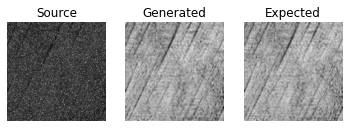

In [83]:
# Plotting the Final Results
model = load_model('model_049610.h5')

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    
    # plot images row by row
    for i in range(len(images)):
        pyplot.subplot(1, 3, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(images[i], cmap='gray')
        pyplot.title(titles[i])
    
    pyplot.savefig('g1.png', bbox_inches='tight')
    pyplot.show()
    


[X1, X2] = dataset
print(X1.shape)
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
print(src_image.shape)

# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

In [65]:
print(ix)

[3173]
